# **Predicting interest rates from Federal Reserve documents**
## Analysis Summary (Vol. 8)
FE 690: Machine Learning in Finance \\
Author: Theo Dimitrasopoulos \\
Advisor: Zachary Feinstein \\

## **Installation**

Required libraries are described in requirements.txt. Please pip install those. The code should run with no issues using Python versions 3.*.
1. Move to src directory
   1. cd src
2. Get data from FOMC Website. You can specify document type and from year.
   1. e.g. python FomcGetData.py all
3. Get calendar from FOMC Website.
   1. python FomcGetCalendar.py
4. Download Market Data
   1.  Economic Indices from FRB of St. Louis
       1.  https://fred.stlouisfed.org/searchresults?nasw=0&st=FED%20Rate&t=rate%3Bfederal%3Binterest%20rate&ob=sr&od=desc&types=gen
   2.  Treasury Yields
       1.  https://www.treasury.gov/resource-center/data-chart-center/interest-rates/Pages/TextView.aspx?data=yieldAll
5. Download Sentiment Dictionary
   1. Loughran and McDonald Sentiment Word Lists (https://sraf.nd.edu/textual-analysis/resources/)
6. Install necessary versions - you can create own virtual environment
   1. pip install numpy==1.16.4
   2. pip install pandas==0.25.0
   3. pip install torch==1.4.0
   4. pip install tqdm==4.43.0
   5. pip install scikit-plot
   6. pip install transformers
7. Run the jupyter notebooks from No.1 to No.6 for analysis

## **Project Description**

### Executive Summary
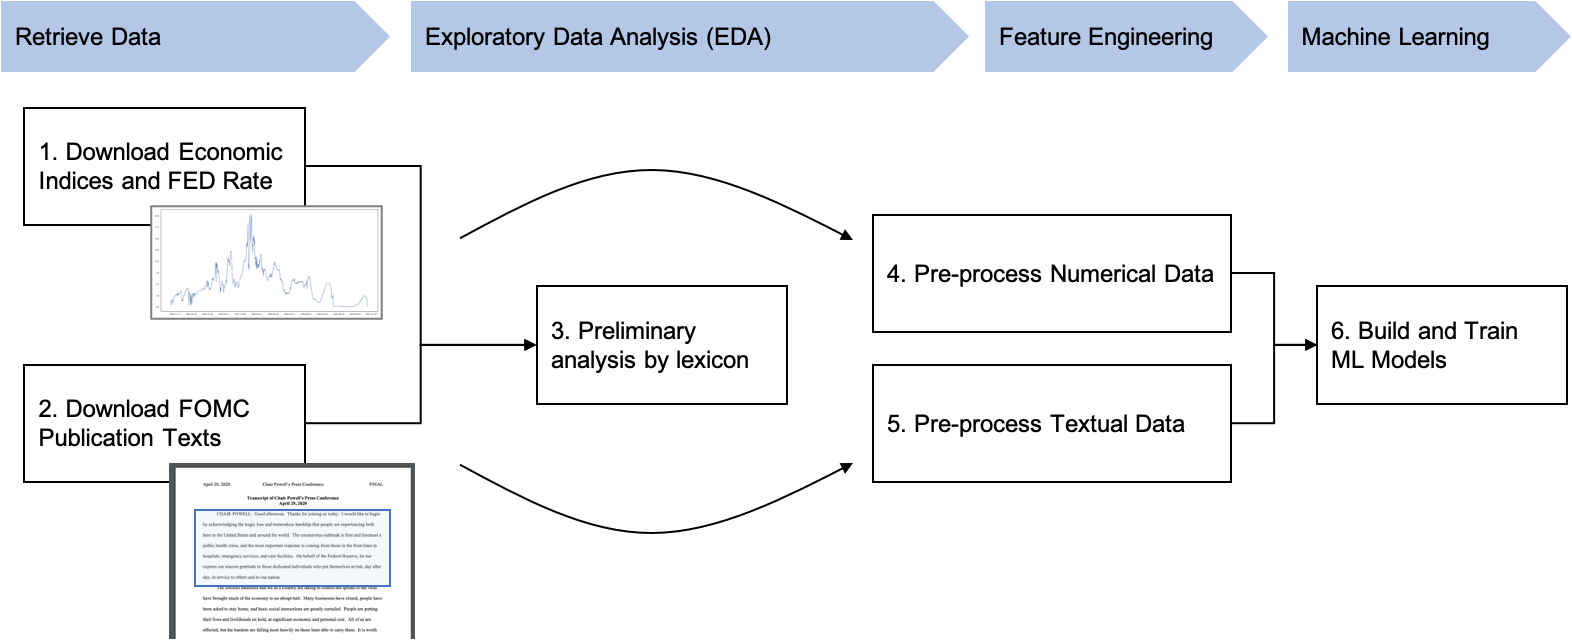

### Business Understanding

FOMC has eight regular meetings to determine the monetary policy.
At each meeting, it publishes press conference minutes, statements as well as scripts in text.
In addition to this regular meetings, the members' speeches and testimonies are also scripted on the website.

At each meeting, the policy makers decide monetary policy and publish the decision along with their view on current economic situation and forecast, including Forward Guidance since 2012.
There are a number of researches conducted in this field how this affects to financial market such return and volatility of rates, credit, equity, FX, etc. before and after the meeting, including short-term to long-term effects.
Others focuses on predicting the target FED rate to be announced in advance using impulse analysis, theoretical rate like Taylor rule, etc.
In fact, FRB itself publishes how the policy makers use the policy rules here:
https://www.federalreserve.gov/monetarypolicy/policy-rules-and-how-policymakers-use-them.htm

The central banks intend to indicate their potential future monetary policy in their publications as a measure of market communication.

The objective of this project is to apply NLP on those text published by FOMC to find latent features.
In this project, I examined whether the prediction of rate hike/lower at each FOMC meeting is possible at meaningful level along with other publicly available economic data.
I also used daily price of market instruments to see whether the same can be used as an alpha factor to gain excess return.

Note that I do not have historical tick data available, so short-term impact of a post-meeting press conference and published statements could not be tested.


### Data Understanding

#### Introduction

The FOMC has eight regular meetings to determine the monetary policy. At each meeting, it publishes press conference minutes, statements as well as scripts in text. In addition to this regular meetings, the members’ speeches and testimonies are also scripted on the website.
At each meeting, the policy makers decide monetary policy and publish the decision along with their view on current economic situation and forecast, including Forward Guidance since 2012. The central banks intend to indicate their potential future monetary policy in their publications as a measure of market communication.
The objective of this project is to apply NLP on those text published by FOMC to find latent features. First, I apply machine learning to economic indices to see how the prediction performs. Then, add pre-processed text data as additional feature in traditional machine learning technique to see if it contains the meaningful information. Finally, apply Deep Learning technique such as LSTM/RNN and BERT to see if these can better predict the rate hike/lower at each FOMC meeting.
All data used in this analysis are publicly available.

*FOMC meeting documents are available here: https://www.federalreserve.gov/monetarypolicy/fomccalendars.htm*

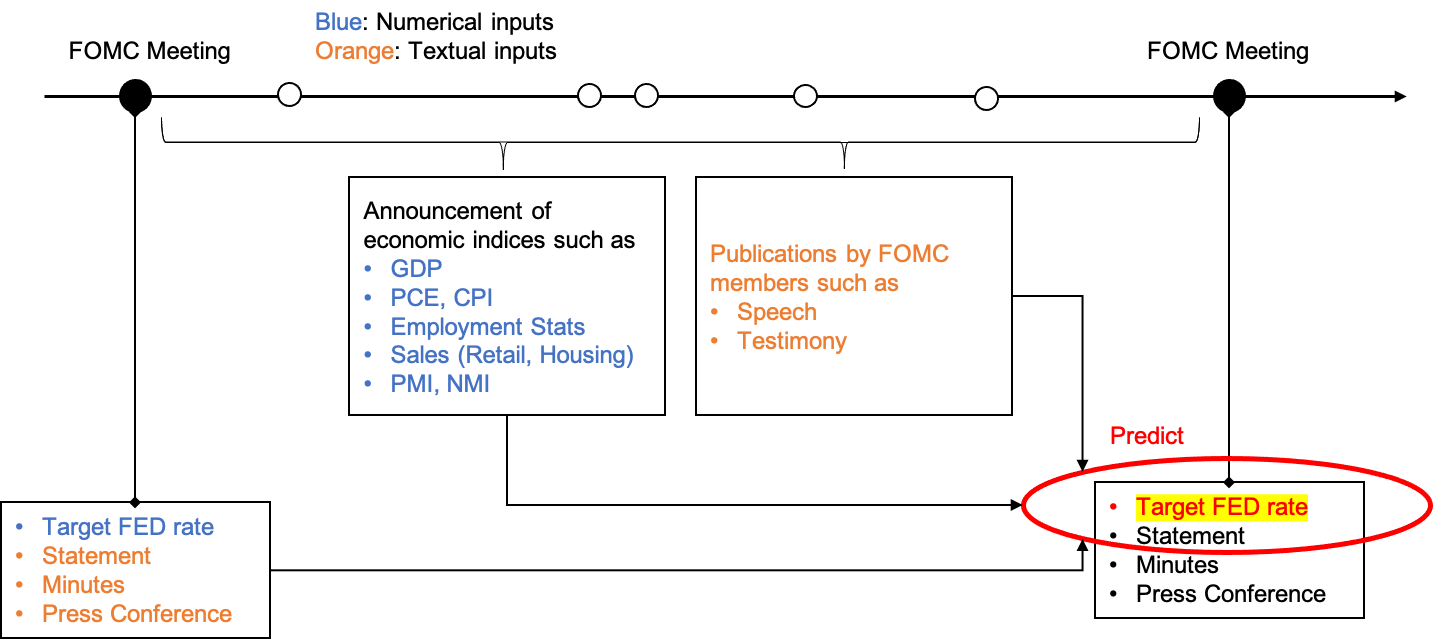

Text data is scraped from FOMC Website. Other economic and market data are downloaded from FRB of St. Louis website (FRED)
Data used for each prediction are only those available before the meeting.


#### Text Data (Scraped)

* FOMC/fomc_calendar.pickle - all FOMC calendar dates
* FOMC/statement.pickle - Statement text along with basic attributes such as dates, speaker, title. Each text is also available in the directory with the same name. Statements are available post press conference for almost all meetings, which include rate decision and target rate. From 2008, target rate became a range instead of a single value.
* FOMC/minutes.pickle - Minutes text along with basic attributes such as dates, speaker, title. Each text is also available
 in the directory with the same name. Minutes are summary of FOMC Meeting and contents are structured in sections and paragraphs, most of which were updated in 2011 and 2012. The minutes of regularly scheduled meetings are released three weeks after the date of the policy decision.
* FOMC/press_conference.pickle - Press conference scripts text along with basic attributes such as dates, speaker, title. Each text is also available in the directory with the same name. This is available from 2011. Starting with the speaker name, so extract those spoken by the chairperson because the other person's words are more likely to be questions and not FOMC's view. It is in pdf form, so download pdf and then process the text.
* FOMC/meeting_script.pickle - Meeting scripts text along with basic attributes such as dates, speaker, title. Each text is also available in the directory with the same name. FOMC decided to publish this five years after each meeting. It contains all the words spoken during the meeting. It will contain some insight about FOMC discussions and how the consensus about monetary policy is built, but cannot be used in prediction as this is not published for five years.  It is in pdf form, so download pdf and then process the text.
* FOMC/speech.pickle -  Speech text along with basic attributes such as dates, speaker, title. Each text is also available in the directory with the same name. There are many speeches published but some of them are not related to monetary policies but various topics such as regulations and governance. Some speeches may contain indication of FOMC policy, so use only those by the chairperson.
* FOMC/testimony.pickle -  Testimony text along with basic attributes such as dates, speaker, title. Each text is also available in the directory with the same name. Like speeches, testimony is not necessarily related to monetary policy. There are semi-annual testimony in the congress, which can be a good inputs of FOMC's view by chairperson, so use only those by the chairperson.

#### Meta Data (From the FRB)


* MarketData/FEDRates
  * DFEDTAR.csv - Target FED Rate till 2008, Daily
  * DFEDTARU.csv - Target Upper FED Rate from 2008, Daily
  * DFEDTARL.csv - Target Lower FED Rate from 2008, Daily
  * DFF.csv - Effective FED Rate, Daily
* MarketData/GDP
  * GDPC1.csv - Real GDP, Quarterly
  * GDPPOT.csv - Real potential GDP, Quarterly
* MarketData/CPI
  * PCEPILFE.csv - Core PCE excluding Food and Energy, Monthly
  * CPIAUCSL.csv - Consumer Price Index for All Urban Consumers: All Items in U.S. City Average
* MarketData/Employment
  * UNRATE.csv - Unemployment Rate, Monthly
  * PAYEMS.csv - Employment, Monthly
* MarketData/Sales
  * RRSFS.csv - Advance Real Retail and Food Services Sales, monthly
  * HSN1F.csv - New Home Sales, monthly
* MarketData/ISM
  * ISM-MAN_PMI.csv - ISM Purchasing Managers Index
  * ISM-NONMAN_NMI.csv - ISM Non-manufacturing Index
* MarketData/Treasury
  * DailyTreasuryYieldCurveRateData.xml - This is downloaded from US Treasury website (https://www.treasury.gov/resource-center/data-chart-center/interest-rates/Pages/TextView.aspx?data=yieldAll). This is optional as not used in the final analysis.

* LoughranMcDonald/LoughranMcDonald_SentimentWordLists_2018.csv


### Data Processing

To clean up the data for the analysis, we perform the following procedures,

#### 1_FOMC_Analysis_Sentiment_Lexicon.ipynb

First, take a glance at the FOMC statement to see if it contains any meaningful information.

---
**Input**
* C:/Users/theon/Desktop/proj2/data/FOMC/statement.pickle
* C:/Users/theon/Desktop/proj2/data/MarketData/FEDRates/DFEDTAR.csv
* C:/Users/theon/Desktop/proj2/data/MarketData/FEDRates/DFEDTARU.csv
* C:/Users/theon/Desktop/proj2/data/MarketData/FEDRates/DFEDTARL.csv

**Output**
* None

**Process**
1. Analyze sentiment of the statement text using Loughran and McDonald Sentiment Word Lists
2. Plot sentiment (count of positive words with negation, negative words and net over time series, normalized by the number of words
3. Load FED Rate, map the rate and decision to statement
4. Plot the moving average of the sentiment along with FED rate and recession period
5. Plot the same with Quantitative Easing and Chairpersons
---

#### 2_FOMC_Analysis_Preprocess_NonText.ipynb

Next, preprocess nontext meta data. Do necessary calculations and add to the calendar dataframe to map those latest available indices as input to the FOMC Fed rate decision.

---
**Input**
* C:/Users/theon/Desktop/proj2/data/FOMC/fomc_calendar.pickle
* All Market Data and Economic Indices

**Output**
* C:/Users/theon/Desktop/proj2/data/preprocessed/nontext_data
* C:/Users/theon/Desktop/proj2/data/preprocessed/nontext_ma2
* C:/Users/theon/Desktop/proj2/data/preprocessed/nontext_ma3
* C:/Users/theon/Desktop/proj2/data/preprocessed/nontext_ma6
* C:/Users/theon/Desktop/proj2/data/preprocessed/nontext_ma12
* C:/Users/theon/Desktop/proj2/data/preprocessed/treasury
* C:/Users/theon/Desktop/proj2/data/preprocessed/fomc_calendar

**Process**
1. Load and plot all numerical data
2. Add FED Rate and rate decisions to FOMC Meeting Calendar
3. Add QE as Lowering event and Tapering as Raising event
4. Add the economic indices to the FOMC Meeting Calendar
5. Calculate Taylor rule
6. Calculate moving average
7. Save data
---

#### 3_FOMC_Analysis_Preprocess_Text.ipynb

---
**Input**
* C:/Users/theon/Desktop/proj2/data/preprocessed/fomc_calendar.pickle
* C:/Users/theon/Desktop/proj2/data/FOMC/statement.pickle
* C:/Users/theon/Desktop/proj2/data/FOMC/minutes.pickle
* C:/Users/theon/Desktop/proj2/data/FOMC/meeting_script.pickle
* C:/Users/theon/Desktop/proj2/data/FOMC/press_conference.pickle
* C:/Users/theon/Desktop/proj2/data/FOMC/speech.pickle
* C:/Users/theon/Desktop/proj2/data/FOMC/testimony.pickle

**Output**
* C:/Users/theon/Desktop/proj2/data/preprocessed/text_no_split
* C:/Users/theon/Desktop/proj2/data/preprocessed/text_split_200
* C:/Users/theon/Desktop/proj2/data/preprocessed/text_keyword

**Process**
1. Add QE announcement to statement
2. Add Rate and Decision to Statement, Minutes, Meeting Script and Presconf Script
3. Add Word Count, Next Meeting Date, Next Meeting Rate and Next Meeting Decision to all inputs
4. Remove return code and separate text by sections
5. Remove short sections - having less number of words that threshold as it is unlikely to hold good information
6. Split text of Step 5 to maximum of 200 words with 50 words overlap
7. Filter text of Step 5 for those having keyword at least 2 times only
---

#### 4_FOMC_Analysis_EDA_NonText.ipynb

---

**Input**
* C:/Users/theon/Desktop/proj2/data/preprocessed/nontext_data.pickle
* C:/Users/theon/Desktop/proj2/data/preprocessed/nontext_ma2.pickle
* C:/Users/theon/Desktop/proj2/data/preprocessed/nontext_ma3.pickle
* C:/Users/theon/Desktop/proj2/data/preprocessed/nontext_ma6.pickle
* C:/Users/theon/Desktop/proj2/data/preprocessed/nontext_ma12.pickle

**Output**
* C:/Users/theon/Desktop/proj2/data/train_data/nontext_train_small
* C:/Users/theon/Desktop/proj2/data/train_data/nontext_train_large

**Process**
1. Check correlation to find good feature to predict Rate Decision
2. Check correlation of moving average to Rate Decision
3. Check correlation of calculated rates and changes by taylor rules
4. Compare distribution of each feature between Rate Decision
5. Fill missing values
6. Create small dataset with selected 9 features and large dataset, which contains all
---

#### Modelling

For modelling, we perform the following,

#### 5_FOMC_Analysis_ML_NonText.ipynb

---
**Input**
* C:/Users/theon/Desktop/proj2/data/train_data/nontext_train_small.pickle or
* C:/Users/theon/Desktop/proj2/data/train_data/nontext_train_large.pickle

**Output**
* C:/Users/theon/Desktop/proj2/data/result/result_scores
* C:/Users/theon/Desktop/proj2/data/result/baseline_predictions
* C:/Users/theon/Desktop/proj2/data/result/training_data

**Process**
1. Balancing the classes
2. Convert the target to integer starting from 0
3. Train test split
4. Apply 14 different classifiers to see how they perform
5. Build and run random search and grid search cross validation models for the following classifiers
   1. ADA Boost on Decision Tree
   2. Extra Tree
   3. Random Forest
   4. Gradient Boosting
   5. Support Vector Machine
6. Check Feature Importance
7. Build and run Ensemble models
   1. Voting Classifier
   2. Stacking by XG Boost
---

#### 6_FOMC_Analysis_ML_Text.ipynb

---
**Input**
* C:/Users/theon/Desktop/proj2/data/train_data/nontext_train_small.pickle
* C:/Users/theon/Desktop/proj2/data/preprocessed/text_no_split
* C:/Users/theon/Desktop/proj2/data/preprocessed/text_split_200
* C:/Users/theon/Desktop/proj2/data/preprocessed/text_keyword
* C:/Users/theon/Desktop/proj2/data/LoughranMcDonald/LoughranMcDonald_SentimentWordLists_2018.csv

**Output**
* ../train_data/train_df
* ../train_data/text_df
* ../train_data/split_train_df

**Process**
1. Check the record count, drop meeting scripts
2. Select which text to use and merge the text to nontext train dataframe
3. View text by creating corpus to see word frequencies
4. Load LoughranMcDonald Sentiment word list and analyze the sentiment of each text
5. Lemmatize, remove stop words, tokenize texts as well as sentiment word
6. Vectorize the text by Tfidf
7. Calculate Cosine Similarity and add difference from the previous text
8. Convert the target to integer starting from 0, use Stratified KFold
9. Model A - Use Cosine Similarity for Random Forest
10. Model B - Use Tfidf vector and merge with meta data to perform Random Forest
11. Model C - Use LSTM (RNN) based text analysis, then merge with meta data at the last dense layer
12. Model D - Use GloVe Word Embedding for Model C
13. Further split of training data to max 200 words with 50 words overlap and perform Model D again
14. Model E - User BERT, then merge with meta data at the last dense layer
---

### Evaluation

The outcome of the analysis are summarised as follows.
We examined whether FOMC text data contains useful insight to predict the FED target rate decision (i.e. Raise, Hold or Lower) at the next FOMC meeting.
The data is imbalanced to have more than 60% as Hold, that is. no rate change, therefore we used F1 score in addition to accuracy to measure the performance.
First, we took major economic indices to predict the FOMC decision using various classification algorithms.
Some estimator simply fail to overfit to train data and failed in test data. Others just predict most of the result as Hold, which is natural from accuracy perspective. As a result of grid search cross validation, Random Forest performed the best with Accuracy of 0.625 and f1 (macro) score of 0.497. Also tried ensembling methods such as voting classifier but did not perform well.
Then, we took text data to build ML model with the non-text economic indices above, then train and performed the learning.  A model using cosine similarity of Tfidf vectors on Loughran McDonald sentiment vocabulary was promissing, achieved Accuracy of 0.67 with F1 score of 0.53. Cosine similarity on Negative word list was used as once of important feature in the model. Then we tried Tfidf itself but only achieved Accuary 0.5 and F1 score 0.39.
To improve the performance of text understanding, we then tried RNN - LSTM with fully connected layer with the non-text data inputs at the end. The result was Accuracy of 0.54 and F1 score of 0.38 - in fact there are too less number of training data to train neural network. We only used the first 200 words where each text is avarage 10,000 words length!
To mitigate this, we then split the text by 200 words with 50 words overlap - one drawback of this approach is the non-text part of inputs are repeated many times and not representing actual frequency any more. The result was Accuracy of 0.64 and F1 score of 0.43. We also tried BERT to represent the text latent features but could not improve the overall performance.
As a conclusion, we could observe some useful information in the text to predict FOMC decision better. However, we could not improve the text based prediction performance by Neural Network. This is partly because there are small number of test data to train with each text very long. This can be potentially improved by splitting text more appropriately for relevant content with proper labelling.

### File Description

* FomcGetCalendar.py - Scraping FOMC Website, create fomc_calendar to save in pickle and csv
* FomcGetData.py - Calls relevant classes to get data from FOMC Website
* fomc_get_data/FomcBase.py - Base abstract class to scrape FOMC Website to download text data
* fomc_get_data/FomcStatement.py - Child class of FomcBase to retrieve statement texts
* fomc_get_data/FomcMinutes.py - Child class of FomcBase to retrieve minutes texts
* fomc_get_data/ScrapePressConference.py - Child class of FomcBase to retrieve press conference script texts
* fomc_get_data/FomcMeetingScript.py - Child class of FomcBase to retrieve meeting script texts
* fomc_get_data/FomcSpeech.py - Child class of FomcBase to retrieve speech texts
* fomc_get_data/FomcTestimony.py - Child class of FomcBase to retrieve testimonny texts
* 1_FOMC_Analysis_Sentiment_Lexicon.ipynb - Jupyter notebook to briefly check statement sentiment
* 2_FOMC_Analysis_Preprocess_NonText.ipynb - Jupytet notebook to preprocess calendar and market data (non text data)
* 3_FOMC_Analysis_Preprocess_Text.ipynb - Jupyter notebook to preprocess text data downloaded from FOMC website
* 4_FOMC_Analysis_EDA_NonText.ipynb - Jupyter notebook for EDA on meta data
* 5_FOMC_Analysis_ML_NonText.ipynb - Jupyter notebook for Machine Learning on meta data
* 6_FOMC_Analysis_ML_Text.ipynb - Jupyter notebook for Machine Learning including textual data

The followings are used only for initial check and not required to run:
* FOMC_analyse_website.ipynb
* FOMC_analyse_website_2.ipynb
* FOMC_check_FEDRate.ipynb
* FOMC_Analysis_BERT_MultiSampleDropoutModel.ipynb
* FOMC_Analysis_BERT_Tensorflow.ipynb
* FOMC_Post_Training_BERT.ipynb
* FOMC_Text_Summarization.ipynb


## **Setup**

### Environment

In [ ]:
# -*- coding: utf-8 -*-

# ENVIRONMENT CHECK:
import sys, os, inspect, site, pprint
# Check whether in Colab:
IN_COLAB = 'google.colab' in sys.modules
if IN_COLAB == True:
  print('YES, this is a Google Colaboratory environment.')
else:
  print('NO, this is not a Google Colaboratory environment.')
print(' ')

# Python installation files:
stdlib = os.path.dirname(inspect.getfile(os))
python_version = !python --version
print('Python Standard Library is located in:\n' + stdlib)
print(' ')
print('This environment is using {}'.format(str(python_version[0])))
print(' ')
print('Local system packages are located in:')
pprint.pprint(site.getsitepackages())
print(' ')
print('Local user packages are located in:\n' + site.getusersitepackages())


YES, this is a Google Colaboratory environment.
 
Python Standard Library is located in:
/usr/lib/python3.6
 
This environment is using Python 3.6.9
 
Local system packages are located in:
['/usr/local/lib/python3.6/dist-packages',
 '/usr/lib/python3/dist-packages',
 '/usr/lib/python3.6/dist-packages']
 
Local user packages are located in:
/root/.local/lib/python3.6/site-packages


### Default Packages

In [ ]:
# Installed packages:
!pip list -v
!pip list --user -v


Package                       Version         Location                               Installer
----------------------------- --------------- -------------------------------------- ---------
absl-py                       0.10.0          /usr/local/lib/python3.6/dist-packages pip      
alabaster                     0.7.12          /usr/local/lib/python3.6/dist-packages pip      
albumentations                0.1.12          /usr/local/lib/python3.6/dist-packages pip      
altair                        4.1.0           /usr/local/lib/python3.6/dist-packages pip      
argon2-cffi                   20.1.0          /usr/local/lib/python3.6/dist-packages pip      
asgiref                       3.3.1           /usr/local/lib/python3.6/dist-packages pip      
astor                         0.8.1           /usr/local/lib/python3.6/dist-packages pip      
astropy                       4.1             /usr/local/lib/python3.6/dist-packages pip      
astunparse                    1.6.3           /usr

### Mount Google Drive

In [ ]:
# Mount Google Drive:
if IN_COLAB:
  from google.colab import drive
  drive.mount('/content/drive', force_remount=True)


Mounted at /content/drive


### System Environment Variables

In [ ]:
if IN_COLAB:
  employment_data_dir = '/content/drive/My Drive/Colab Notebooks/proj2/src/data/MarketData/Employment/'
  cpi_data_dir = '/content/drive/My Drive/Colab Notebooks/proj2/src/data/MarketData/CPI/'
  fed_rates_dir = '/content/drive/My Drive/Colab Notebooks/proj2/src/data/MarketData/FEDRates/'
  fx_rates_dir = '/content/drive/My Drive/Colab Notebooks/proj2/src/data/MarketData/FXRates/'
  gdp_data_dir = '/content/drive/My Drive/Colab Notebooks/proj2/src/data/MarketData/GDP/'
  ism_data_dir = '/content/drive/My Drive/Colab Notebooks/proj2/src/data/MarketData/ISM/'
  sales_data_dir = '/content/drive/My Drive/Colab Notebooks/proj2/src/data/MarketData/Sales/'
  treasury_data_dir = '/content/drive/My Drive/Colab Notebooks/proj2/src/data/MarketData/Treasury/'
  fomc_dir = '/content/drive/My Drive/Colab Notebooks/proj2/src/data/FOMC/'
  preprocessed_dir = '/content/drive/My Drive/Colab Notebooks/proj2/src/data/preprocessed/'
  train_dir = '/content/drive/My Drive/Colab Notebooks/proj2/src/data/train_data/'
  output_dir = '/content/drive/My Drive/Colab Notebooks/proj2/src/data/result/'
  keyword_lm_dir = '/content/drive/My Drive/Colab Notebooks/proj2/src/data/LoughranMcDonald/'
  glove_dir = '/content/drive/My Drive/Colab Notebooks/proj2/src/data/GloVe/'
  model_dir = '/content/drive/My Drive/Colab Notebooks/proj2/src/data/models/'
  graph_dir = '/content/drive/My Drive/Colab Notebooks/proj2/src/data/graphs/'
else:
  employment_data_dir = 'C:/Users/theon/GDrive/Colab Notebooks/proj2/src/data/MarketData/Employment/'
  cpi_data_dir = 'C:/Users/theon/GDrive/Colab Notebooks/proj2/src/data/MarketData/CPI/'
  fed_rates_dir = 'C:/Users/theon/GDrive/Colab Notebooks/proj2/src/data/MarketData/FEDRates/'
  fx_rates_dir = 'C:/Users/theon/GDrive/Colab Notebooks/proj2/src/data/MarketData/FXRates/'
  gdp_data_dir = 'C:/Users/theon/GDrive/Colab Notebooks/proj2/src/data/MarketData/GDP/'
  ism_data_dir = 'C:/Users/theon/GDrive/Colab Notebooks/proj2/src/data/MarketData/ISM/'
  sales_data_dir = 'C:/Users/theon/GDrive/Colab Notebooks/proj2/src/data/MarketData/Sales/'
  treasury_data_dir = 'C:/Users/theon/GDrive/Colab Notebooks/proj2/src/data/MarketData/Treasury/'
  fomc_dir = 'C:/Users/theon/GDrive/Colab Notebooks/proj2/src/data/FOMC/'
  preprocessed_dir = 'C:/Users/theon/GDrive/Colab Notebooks/proj2/src/data/preprocessed/'
  train_dir = 'C:/Users/theon/GDrive/Colab Notebooks/proj2/src/data/train_data/'
  output_dir = 'C:/Users/theon/GDrive/Colab Notebooks/proj2/src/data/result/'
  keyword_lm_dir = 'C:/Users/theon/GDrive/Colab Notebooks/proj2/src/data/LoughranMcDonald/'
  glove_dir = 'C:/Users/theon/GDrive/Colab Notebooks/proj2/src/data/GloVe/'
  model_dir = 'C:/Users/theon/GDrive/Colab Notebooks/proj2/src/data/models/'
  graph_dir = 'C:/Users/theon/GDrive/Colab Notebooks/proj2/src/data/graphs/'


### Packages

#### Uninstall/Install Packages:

In [ ]:
# Note: After the following pip install, need to restart the kernel.
# Required modules - written here so that it can setup a new instance in Colab. Not required to run every time.

if IN_COLAB:
  # Uninstall existing versions:
  !pip uninstall bs4 -y
  !pip uninstall textract -y
  !pip uninstall numpy -y
  !pip uninstall pandas -y
  !pip uninstall requests -y
  !pip uninstall tqdm -y
  !pip uninstall nltk -y
  !pip uninstall quandl -y
  !pip uninstall scikit-plot -y
  !pip uninstall seaborn -y
  !pip uninstall sklearn -y
  !pip uninstall torch -y
  !pip uninstall transformers -y
  !pip uninstall wordcloud -y
  !pip uninstall xgboost -y
  
  # Install packages:
  !pip install bs4==0.0.1
  !pip install textract==1.6.3
  !pip install numpy==1.19.4
  !pip install pandas==1.1.4
  !pip install requests==2.24.0
  !pip install tqdm==4.51.0
  !pip install nltk==3.5
  !pip install quandl==3.5.3
  !pip install scikit-plot==0.3.7
  !pip install seaborn==0.11.0
  !pip install sklearn==0.0
  !pip install torch==1.7.1+cu101 torchvision==0.8.2+cu101 -f https://download.pytorch.org/whl/torch_stable.html
  !pip install transformers==3.5.0
  !pip install wordcloud==1.8.0
  !pip install xgboost==1.2.1
  #os.kill(os.getpid(), 9)


Uninstalling bs4-0.0.1:
  Successfully uninstalled bs4-0.0.1
Uninstalling numpy-1.19.5:
  Successfully uninstalled numpy-1.19.5
Uninstalling pandas-1.1.5:
  Successfully uninstalled pandas-1.1.5
Uninstalling requests-2.23.0:
  Successfully uninstalled requests-2.23.0
Uninstalling tqdm-4.41.1:
  Successfully uninstalled tqdm-4.41.1
Uninstalling nltk-3.2.5:
  Successfully uninstalled nltk-3.2.5
Uninstalling seaborn-0.11.1:
  Successfully uninstalled seaborn-0.11.1
Uninstalling sklearn-0.0:
  Successfully uninstalled sklearn-0.0
Uninstalling torch-1.7.0+cu101:
  Successfully uninstalled torch-1.7.0+cu101
Uninstalling wordcloud-1.5.0:
  Successfully uninstalled wordcloud-1.5.0
Uninstalling xgboost-0.90:
  Successfully uninstalled xgboost-0.90
  Created wheel for bs4: filename=bs4-0.0.1-cp36-none-any.whl size=1273 sha256=98b02fc4b9fd9456db47ec336d422e5bd557085b2fa976e206a59df021984df7
  Stored in directory: /root/.cache/pip/wheels/a0/b0/b2/4f80b9456b87abedbc0bf2d52235414c3467d8889be38dd472


     |████████████████████████████████| 14.5MB 7.6MB/s 
ERROR: xarray 0.15.1 requires pandas>=0.25, which is not installed.
ERROR: torchvision 0.8.1+cu101 requires torch==1.7.0, which is not installed.
ERROR: torchtext 0.3.1 requires requests, which is not installed.
ERROR: torchtext 0.3.1 requires torch, which is not installed.
ERROR: torchtext 0.3.1 requires tqdm, which is not installed.
ERROR: thinc 7.4.0 requires tqdm<5.0.0,>=4.10.0, which is not installed.
ERROR: tensorflow-datasets 4.0.1 requires requests>=2.19.0, which is not installed.
ERROR: tensorflow-datasets 4.0.1 requires tqdm, which is not installed.
ERROR: tensorboard 2.4.0 requires requests<3,>=2.21.0, which is not installed.
ERROR: statsmodels 0.10.2 requires pandas>=0.19, which is not installed.
ERROR: spacy 2.2.4 requires requests<3.0.0,>=2.13.0, which is not installed.
ERROR: spacy 2.2.4 requires tqdm<5.0.0,>=4.38.0, which is not installed.
ERROR: sklearn-pandas 1.8.0 requires pandas>=0.11.0, which is not installed.

     |████████████████████████████████| 9.5MB 6.3MB/s 
ERROR: pymc3 3.7 requires tqdm>=4.8.4, which is not installed.
ERROR: pandas-datareader 0.9.0 requires requests>=2.19.0, which is not installed.
ERROR: google-colab 1.0.0 requires requests~=2.23.0, which is not installed.
ERROR: fix-yahoo-finance 0.0.22 requires requests, which is not installed.
ERROR: fbprophet 0.7.1 requires tqdm>=4.36.1, which is not installed.
ERROR: fastai 1.0.61 requires requests, which is not installed.
ERROR: fastai 1.0.61 requires torch>=1.0.0, which is not installed.
ERROR: google-colab 1.0.0 has requirement six~=1.15.0, but you'll have six 1.12.0 which is incompatible.


     |████████████████████████████████| 71kB 1.4MB/s 
ERROR: torchtext 0.3.1 requires torch, which is not installed.
ERROR: torchtext 0.3.1 requires tqdm, which is not installed.
ERROR: tensorflow-datasets 4.0.1 requires tqdm, which is not installed.
ERROR: spacy 2.2.4 requires tqdm<5.0.0,>=4.38.0, which is not installed.
ERROR: kaggle 1.5.10 requires tqdm, which is not installed.
ERROR: gdown 3.6.4 requires tqdm, which is not installed.
ERROR: fastai 1.0.61 requires torch>=1.0.0, which is not installed.
ERROR: google-colab 1.0.0 has requirement requests~=2.23.0, but you'll have requests 2.24.0 which is incompatible.
ERROR: google-colab 1.0.0 has requirement six~=1.15.0, but you'll have six 1.12.0 which is incompatible.
ERROR: datascience 0.10.6 has requirement folium==0.2.1, but you'll have folium 0.8.3 which is incompatible.
     |████████████████████████████████| 71kB 5.4MB/s 
ERROR: torchtext 0.3.1 requires torch, which is not installed.
ERROR: fastai 1.0.61 requires torch>=1.0.0, 

#### Inspect Packages

In [ ]:
!pip list -v
!pip list --user -v


Package                       Version         Location                               Installer
----------------------------- --------------- -------------------------------------- ---------
absl-py                       0.10.0          /usr/local/lib/python3.6/dist-packages pip      
alabaster                     0.7.12          /usr/local/lib/python3.6/dist-packages pip      
albumentations                0.1.12          /usr/local/lib/python3.6/dist-packages pip      
altair                        4.1.0           /usr/local/lib/python3.6/dist-packages pip      
argon2-cffi                   20.1.0          /usr/local/lib/python3.6/dist-packages pip      
asgiref                       3.3.1           /usr/local/lib/python3.6/dist-packages pip      
astor                         0.8.1           /usr/local/lib/python3.6/dist-packages pip      
astropy                       4.1             /usr/local/lib/python3.6/dist-packages pip      
astunparse                    1.6.3           /usr

#### Import Packages:

In [ ]:
# Python libraries
import pprint
import datetime as dt
import re
import pickle
from tqdm.notebook import tqdm
import time
import logging
import random
from collections import defaultdict, Counter
import xgboost as xgb

# Data Science modules
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()
plt.style.use('ggplot')

# Import Scikit-learn models
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.metrics import accuracy_score, f1_score, plot_confusion_matrix
from sklearn.pipeline import Pipeline, FeatureUnion
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier, ExtraTreesClassifier, VotingClassifier
from sklearn.linear_model import LogisticRegression, Perceptron, SGDClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.svm import SVC, LinearSVC
from sklearn import model_selection
from sklearn.model_selection import GridSearchCV, cross_val_score, cross_validate, StratifiedKFold, learning_curve, RandomizedSearchCV
import scikitplot as skplt

# Import nltk modules and download dataset
import nltk
from nltk.corpus import stopwords
from nltk.util import ngrams
from nltk.tokenize import word_tokenize, sent_tokenize

# Import Pytorch modules
import torch
from torch import nn, optim
import torch.nn.functional as F
from torch.utils.data import (DataLoader, RandomSampler, SequentialSampler, TensorDataset)
from torch.autograd import Variable
from torch.optim import Adam, AdamW

#### Settings

In [ ]:
# General:
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline
get_ipython().run_line_magic('matplotlib', 'inline')


In [ ]:
# Set display preference (Optional)
plt.rcParams["figure.figsize"] = (18,9)
plt.style.use('fivethirtyeight')
sns.set(style='white', context='notebook', palette='deep')

pd.options.display.max_rows = 20
pd.options.display.max_seq_items = 50
pd.set_option('display.max_colwidth', 200)

In [ ]:
# Fiinalize nltk setup:
nltk.download('stopwords')
nltk.download('punkt')
nltk.download('wordnet')

stop = set(stopwords.words('english'))

# Test pprint
pprint.pprint(sys.path)


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
['',
 '/env/python',
 '/usr/lib/python36.zip',
 '/usr/lib/python3.6',
 '/usr/lib/python3.6/lib-dynload',
 '/usr/local/lib/python3.6/dist-packages',
 '/usr/lib/python3/dist-packages',
 '/usr/local/lib/python3.6/dist-packages/IPython/extensions',
 '/root/.ipython']


In [ ]:
## Use TPU
#if IN_COLAB:
#  assert os.environ['COLAB_TPU_ADDR'], 'Select TPU: Runtime > Change runtime type > Hardware accelerator'
#  VERSION = "20200220"
#  !curl https://raw.githubusercontent.com/pytorch/xla/master/contrib/scripts/env-setup.py -o pytorch-xla-env-setup.py
#  !python pytorch-xla-env-setup.py --version $VERSION

In [ ]:
## Use GPU Runtime:
if IN_COLAB:
  if torch.cuda.is_available():
    torch.cuda.get_device_name(0)
    gpu_info = !nvidia-smi
    gpu_info = '\n'.join(gpu_info)
    print(gpu_info)
  else:
    print('Select the Runtime > "Change runtime type" menu to enable a GPU accelerator, and then re-execute this cell.')
    os.kill(os.getpid(), 9)  


Wed Jan 27 00:40:20 2021       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 460.32.03    Driver Version: 418.67       CUDA Version: 10.1     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla V100-SXM2...  Off  | 00000000:00:04.0 Off |                    0 |
| N/A   37C    P0    23W / 300W |     10MiB / 16130MiB |      0%      Default |
|                               |                      |                 ERR! |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

In [ ]:
# Set logger
logger = logging.getLogger('mylogger')
logger.setLevel(logging.DEBUG)
timestamp = time.strftime("%Y.%m.%d_%H.%M.%S", time.localtime())
fh = logging.FileHandler('log_model.txt')
fh.setLevel(logging.DEBUG)
ch = logging.StreamHandler()
ch.setLevel(logging.DEBUG)
formatter = logging.Formatter('[%(asctime)s][%(levelname)s] ## %(message)s')
fh.setFormatter(formatter)
ch.setFormatter(formatter)
logger.addHandler(fh)
logger.addHandler(ch)

In [ ]:
# Set Random Seed
random.seed(42)
np.random.seed(42)
torch.manual_seed(42)
torch.cuda.manual_seed(42)
rand_seed = 42

In [ ]:
# Set Seaborn Style
sns.set(style='white', context='notebook', palette='deep')

## **Function Definitions**

### Save df to .pickle + .csv

In [ ]:
if IN_COLAB:
  def save_data(df, file_name, dir_name=train_dir, index_csv=True):
    if not os.path.exists(dir_name):
      os.mkdir(dir_name)
    # Save results to a picke file
    file = open(dir_name + file_name + '.pickle', 'wb')
    pickle.dump(df, file)
    file.close()
    print('Successfully saved {}.pickle. in {}'.format(file_name, dir_name + file_name + '.pickle'))
    # Save results to a csv file
    df.to_csv(dir_name + file_name + '.csv', index=index_csv)
    print('Successfully saved {}.csv. in {}'.format(file_name, dir_name + file_name + '.csv'))

else:
  def save_data(df, file_name, dir_name=train_dir, index_csv=True):
    # Save results to a .picke file
    file = open(dir_name + file_name + '.pickle', 'wb')
    pickle.dump(df, file)
    file.close()
    print('Successfully saved {}.pickle. in {}'.format(file_name, dir_name + file_name + '.pickle'))
    # Save results to a .csv file
    df.to_csv(dir_name + file_name + '.csv', index=index_csv)
    print('Successfully saved {}.csv. in {}'.format(file_name, dir_name + file_name + '.csv'))


In [ ]:
import numpy as np
import pandas as pd
import datetime as dt
import os
import io
from dateutil.relativedelta import *

import seaborn as sns; sns.set()
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker

import pickle
from tqdm.notebook import tqdm
import re

plt.style.use('fivethirtyeight')
sns.set(style='white', context='notebook', palette='deep')
pd.options.display.max_rows = 20
%pprint

Pretty printing has been turned OFF


Run `fomc_get_calendar.py` to scrape FOMC Meeting calenadrs from FOMC wetbiste

In [ ]:
file = open('../data/preprocessed/fomc_calendar.pickle', 'rb')
calendar_df = pickle.load(file)
calendar_df['RateDecision'] = calendar_df['RateDecision'].apply(lambda x: 'Raise' if x==1 else ('Lower' if x==-1 else 'Hold'))
file.close()
calendar_df[['ChairPerson', 'RateDecision', 'Rate', 'RateDiff']].iloc[:-3]


ChairPerson RateDecision  Rate  RateDiff
date                                                  
1982-10-05   Paul Volcker        Lower   9.5      -0.5
1982-11-16   Paul Volcker        Lower   9.0      -0.5
1982-12-21   Paul Volcker         Hold   8.5       0.0
1983-01-14   Paul Volcker         Hold   8.5       0.0
1983-01-21   Paul Volcker         Hold   8.5       0.0
...                   ...          ...   ...       ...
2020-03-23  Jerome Powell         Hold   0.0       0.0
2020-03-31  Jerome Powell         Hold   0.0       0.0
2020-04-29  Jerome Powell         Hold   0.0       0.0
2020-06-10  Jerome Powell         Hold   0.0       0.0
2020-07-29  Jerome Powell         Hold   0.0       0.0

[400 rows x 4 columns]

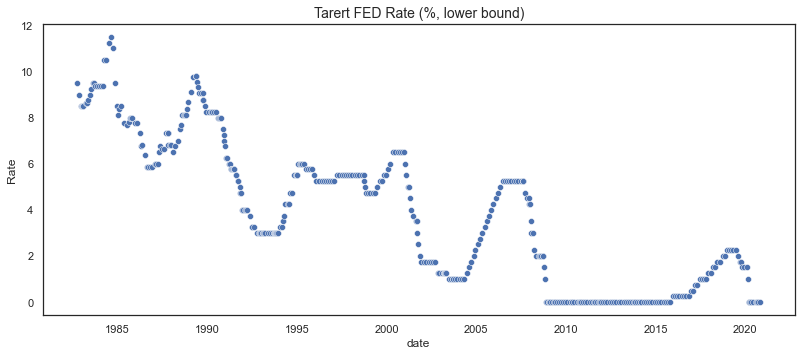

In [ ]:
plt.figure(figsize=(12,5))
sns.scatterplot(x=calendar_df.index.get_level_values(0), y=calendar_df['Rate'])
plt.title('Tarert FED Rate (%, lower bound)', fontsize=14)
plt.show()

## **Download Economic Indices**
Important economic indices are obtained from Economic Research in FRB of St. Louis Website called FRED (https://fred.stlouisfed.org/).
 - FED Target Rates (range)
 - GDP (Real, Real Estimate)
 - CPI / PCE
 - Employment and Unemployment
 - Retail Sales and Home Sales
 - ISM Purchasing Managers Index and Non-manufacturing Index

In [ ]:
file = open('../data/preprocessed/nontext_data.pickle', 'rb')
meta_df = pickle.load(file)
file.close()
meta_df.columns

Index(['unscheduled', 'forecast', 'confcall', 'ChairPerson', 'Rate',
       'RateDiff', 'RateDecision', 'RateChanged', 'GDP_date', 'GDP_value',
       'GDP_diff_prev', 'GDP_diff_year', 'GDPPOT_date', 'GDPPOT_value',
       'GDPPOT_diff_prev', 'GDPPOT_diff_year', 'PCE_date', 'PCE_value',
       'PCE_diff_prev', 'PCE_diff_year', 'CPI_date', 'CPI_value',
       'CPI_diff_prev', 'CPI_diff_year', 'Unemp_date', 'Unemp_value',
       'Unemp_diff_prev', 'Unemp_diff_year', 'Employ_date', 'Employ_value',
       'Employ_diff_prev', 'Employ_diff_year', 'PMI_date', 'PMI_value',
       'PMI_diff_prev', 'PMI_diff_year', 'NMI_date', 'NMI_value',
       'NMI_diff_prev', 'NMI_diff_year', 'Rsales_date', 'Rsales_value',
       'Rsales_diff_prev', 'Rsales_diff_year', 'Hsales_date', 'Hsales_value',
       'Hsales_diff_prev', 'Hsales_diff_year', 'Taylor', 'Balanced', 'Inertia',
       'Taylor-Rate', 'Balanced-Rate', 'Inertia-Rate', 'Taylor_diff',
       'Balanced_diff', 'Inertia_diff'],
      dtype='object')

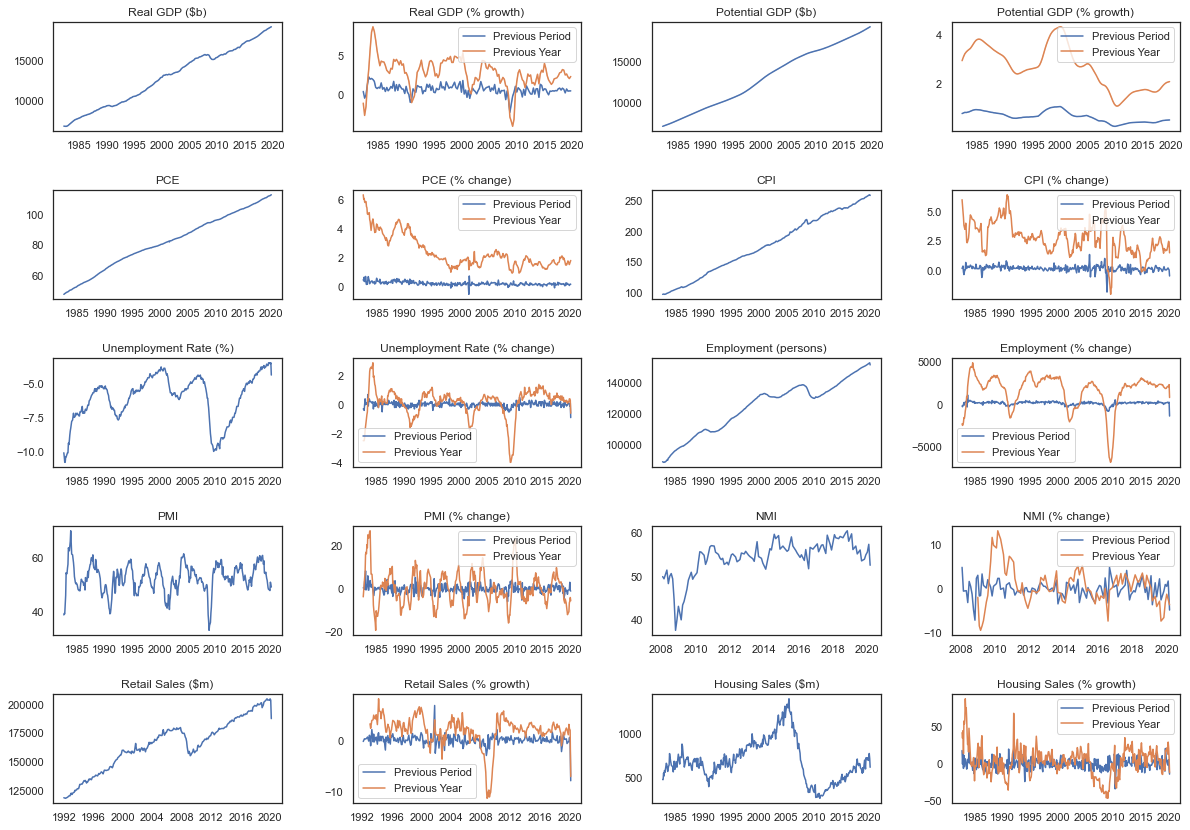

In [ ]:
fig, axes = plt.subplots(5,4,figsize=(17,12))
sns.lineplot(x=meta_df['GDP_date'], y=meta_df['GDP_value'].values, ax=axes[0][0])
sns.lineplot(x=meta_df['GDP_date'], y=meta_df['GDP_diff_prev'].values, ax=axes[0][1])
sns.lineplot(x=meta_df['GDP_date'], y=meta_df['GDP_diff_year'].values, ax=axes[0][1])
sns.lineplot(x=meta_df['GDPPOT_date'], y=meta_df['GDPPOT_value'].values, ax=axes[0][2])
sns.lineplot(x=meta_df['GDPPOT_date'], y=meta_df['GDPPOT_diff_prev'].values, ax=axes[0][3])
sns.lineplot(x=meta_df['GDPPOT_date'], y=meta_df['GDPPOT_diff_year'].values, ax=axes[0][3])
sns.lineplot(x=meta_df['PCE_date'], y=meta_df['PCE_value'].values, ax=axes[1][0])
sns.lineplot(x=meta_df['PCE_date'], y=meta_df['PCE_diff_prev'].values, ax=axes[1][1])
sns.lineplot(x=meta_df['PCE_date'], y=meta_df['PCE_diff_year'].values, ax=axes[1][1])
sns.lineplot(x=meta_df['CPI_date'], y=meta_df['CPI_value'].values, ax=axes[1][2])
sns.lineplot(x=meta_df['CPI_date'], y=meta_df['CPI_diff_prev'].values, ax=axes[1][3])
sns.lineplot(x=meta_df['CPI_date'], y=meta_df['CPI_diff_year'].values, ax=axes[1][3])
sns.lineplot(x=meta_df['Unemp_date'], y=meta_df['Unemp_value'].values, ax=axes[2][0])
sns.lineplot(x=meta_df['Unemp_date'], y=meta_df['Unemp_diff_prev'].values, ax=axes[2][1])
sns.lineplot(x=meta_df['Unemp_date'], y=meta_df['Unemp_diff_year'].values, ax=axes[2][1])
sns.lineplot(x=meta_df['Employ_date'], y=meta_df['Employ_value'].values, ax=axes[2][2])
sns.lineplot(x=meta_df['Employ_date'], y=meta_df['Employ_diff_prev'].values, ax=axes[2][3])
sns.lineplot(x=meta_df['Employ_date'], y=meta_df['Employ_diff_year'].values, ax=axes[2][3])
sns.lineplot(x=meta_df['PMI_date'], y=meta_df['PMI_value'].values, ax=axes[3][0])
sns.lineplot(x=meta_df['PMI_date'], y=meta_df['PMI_diff_prev'].values, ax=axes[3][1])
sns.lineplot(x=meta_df['PMI_date'], y=meta_df['PMI_diff_year'].values, ax=axes[3][1])
sns.lineplot(x=meta_df['NMI_date'], y=meta_df['NMI_value'].values, ax=axes[3][2])
sns.lineplot(x=meta_df['NMI_date'], y=meta_df['NMI_diff_prev'].values, ax=axes[3][3])
sns.lineplot(x=meta_df['NMI_date'], y=meta_df['NMI_diff_year'].values, ax=axes[3][3])
sns.lineplot(x=meta_df['Rsales_date'], y=meta_df['Rsales_value'].values, ax=axes[4][0])
sns.lineplot(x=meta_df['Rsales_date'], y=meta_df['Rsales_diff_prev'].values, ax=axes[4][1])
sns.lineplot(x=meta_df['Rsales_date'], y=meta_df['Rsales_diff_year'].values, ax=axes[4][1])
sns.lineplot(x=meta_df['Hsales_date'], y=meta_df['Hsales_value'].values, ax=axes[4][2])
sns.lineplot(x=meta_df['Hsales_date'], y=meta_df['Hsales_diff_prev'].values, ax=axes[4][3])
sns.lineplot(x=meta_df['Hsales_date'], y=meta_df['Hsales_diff_year'].values, ax=axes[4][3])

for i in range(len(axes)):
    for j in range(len(axes[i])):
        axes[i][j].set_xlabel("")
        if (j == 1) | (j == 3):
            axes[i][j].legend(['Previous Period', 'Previous Year'])

axes[0][0].set_title('Real GDP ($b)')
axes[0][1].set_title('Real GDP (% growth)')
axes[0][2].set_title('Potential GDP ($b)')
axes[0][3].set_title('Potential GDP (% growth)')
axes[1][0].set_title('PCE')
axes[1][1].set_title('PCE (% change)')
axes[1][2].set_title('CPI')
axes[1][3].set_title('CPI (% change)')
axes[2][0].set_title('Unemployment Rate (%)')
axes[2][1].set_title('Unemployment Rate (% change)')
axes[2][2].set_title('Employment (persons)')
axes[2][3].set_title('Employment (% change)')
axes[3][0].set_title('PMI')
axes[3][1].set_title('PMI (% change)')
axes[3][2].set_title('NMI')
axes[3][3].set_title('NMI (% change)')
axes[4][0].set_title('Retail Sales ($m)')
axes[4][1].set_title('Retail Sales (% growth)')
axes[4][2].set_title('Housing Sales ($m)')
axes[4][3].set_title('Housing Sales (% growth)')


#ax.xaxis.set_major_locator(ticker.MultipleLocator(2000))
plt.tight_layout(pad=2.0)
plt.show()

## **Scraping FOMC Website**
Run `fomc_get_data.py` to crawl and download texts from the website.

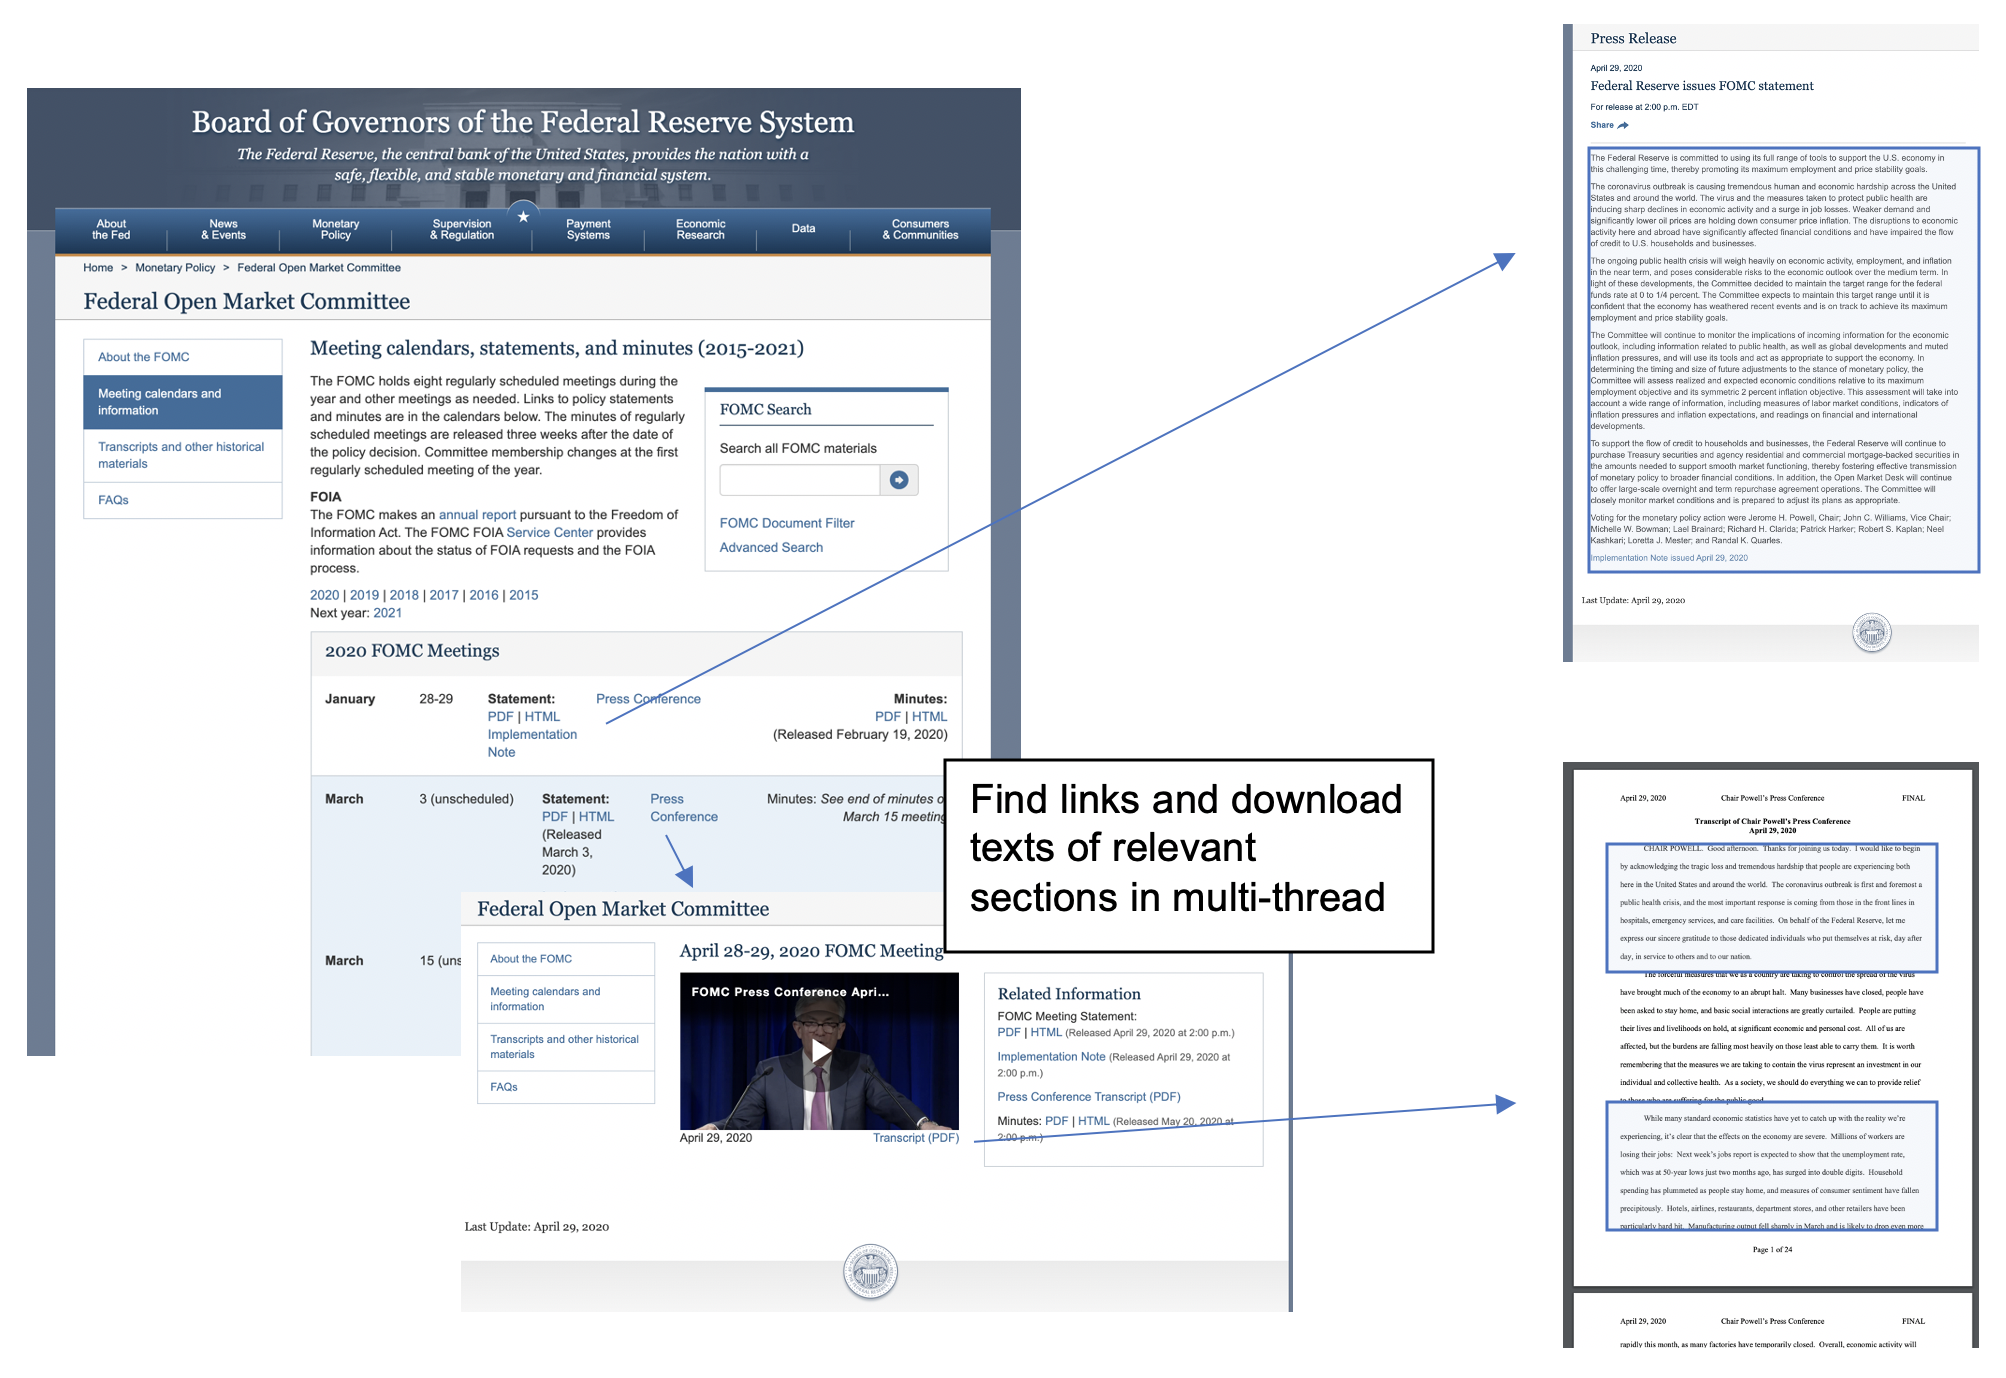

### Sample statement

In [ ]:
file = open('../data/preprocessed/text_no_split.pickle', 'rb')
text_df = pickle.load(file)
file.close()

In [ ]:
print(text_df.loc[text_df['type']=='statement']['date'].iloc[-2].strftime('%Y-%m-%d'))
print('------------')
print(text_df.loc[text_df['type']=='statement']['text'].iloc[-2].replace(". ", ".\n\n"))

2020-06-10
------------
The coronavirus outbreak is causing tremendous human and economic hardship across the United States and around the world.

The virus and the measures taken to protect public health have induced sharp declines in economic activity and a surge in job losses.

Weaker demand and significantly lower oil prices are holding down consumer price inflation.

Financial conditions have improved, in part reflecting policy measures to support the economy and the flow of credit to U.S.

households and businesses.

The ongoing public health crisis will weigh heavily on economic activity, employment, and inflation in the near term, and poses considerable risks to the economic outlook over the medium term.

In light of these developments, the Committee decided to maintain the target range for the federal funds rate at 0 to 1/4 percent.

The Committee expects to maintain this target range until it is confident that the economy has weathered recent events and is on track to achieve

### Sample minutes

In [ ]:
print(text_df.loc[text_df['type']=='minutes']['date'].iloc[-1].strftime('%Y-%m-%d'))
print('------------')
print(text_df.loc[text_df['type']=='minutes']['text'].iloc[-1].replace(". ", ".\n\n"))

2020-04-29
------------
Eric C.

Engstrom, Deputy Associate Director, Division of Monetary Affairs, Board of Governors; Patrick E.

McCabe and John M.

Roberts, Deputy Associate Directors, Division of Research and Statistics, Board of Governors; Andrea Raffo, Deputy Associate Director, Division of International Finance, Board of Governors; Jeffrey D.

Walker,2 Deputy Associate Director, Division of Reserve Bank Operations and Payment Systems, Board of Governors Developments in Financial Markets and Open Market OperationsThe System Open Market Account (SOMA) manager first discussed developments in financial markets.

Financial conditions had shown notable improvement over recent weeks.

Equity price indexes were up substantially from the lows of late March, safe-haven demands for the dollar had receded, and measures of realized and implied volatility across markets had diminished.

Market participants pointed to swift and forceful actions taken by the Federal Reserve, coupled with stron

In [ ]:
print(text_df.loc[text_df['type']=='presconf_script']['date'].iloc[-1].strftime('%Y-%m-%d'))
print('------------')
print(text_df.loc[text_df['type']=='presconf_script']['text'].iloc[-1].replace(". ", ".\n\n"))

2020-04-29
------------
 Good afternoon.

 Thanks for joining us today.

 I would like to begin by acknowledging the tragic loss and tremendous hardship that people are experiencing both here in the United States and around the world.

 The coronavirus outbreak is first and foremost a public health crisis, and the most important response is coming from those in the front lines in hospitals, emergency services, and care facilities.

 On behalf of the Federal Reserve, let me express our sincere gratitude to those dedicated individuals who put themselves at risk, day after day, in service to others and to our nation.

The forceful measures that we as a country are taking to control the spread of the virus have brought much of the economy to an abrupt halt.

 Many businesses have closed, people have been asked to stay home, and basic social interactions are greatly curtailed.

 People are putting their lives and livelihoods on hold, at significant economic and personal cost.

 All of us ar

Text(0.5, 1.0, 'The number of text data')

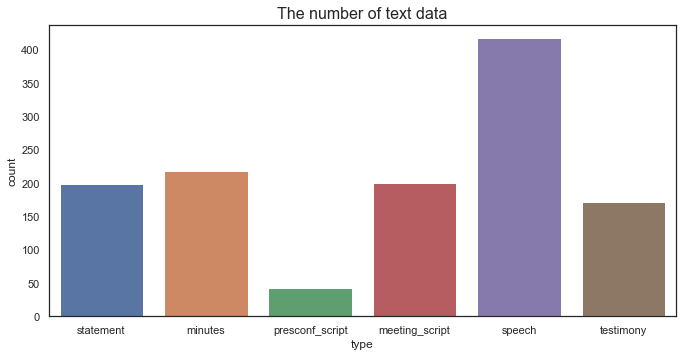

In [ ]:
kwargs={'label': [1,2,3,4,5,6]}
plt.figure(figsize=(10,5))
sns.countplot(x='type', data=text_df.groupby(by=['type', 'date']).count().reset_index(),
             order=['statement', 'minutes', 'presconf_script', 'meeting_script', 'speech', 'testimony'], **kwargs)
plt.title('The number of text data', fontsize=16)

/Users/yuki/miniconda3/envs/fomc/lib/python3.6/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


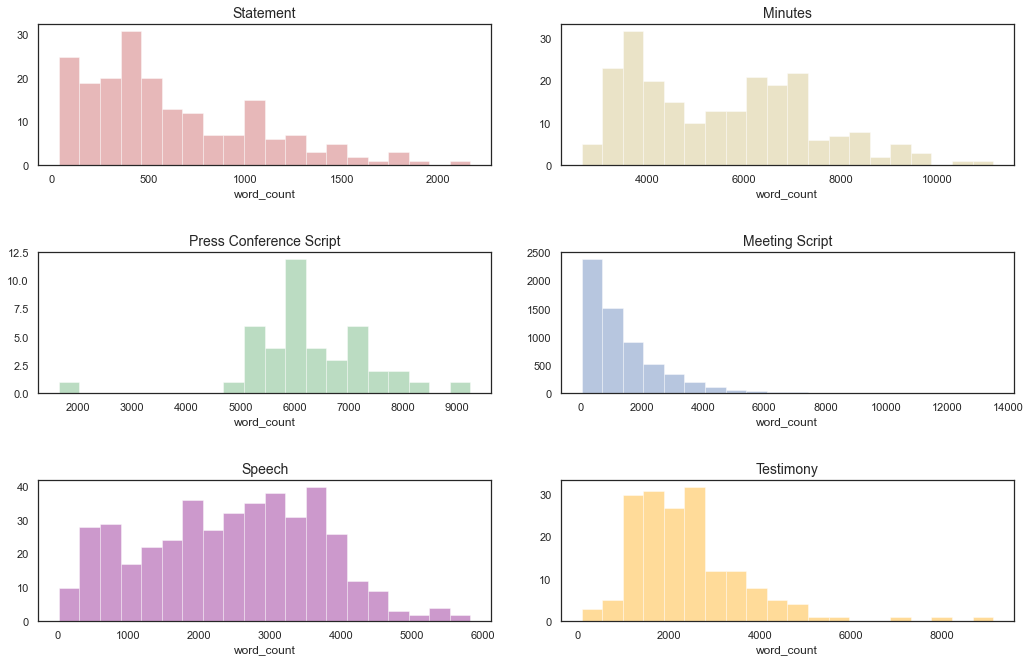

In [ ]:
fig, axes = plt.subplots(3, 2, figsize=(15,10))
sns.distplot(text_df.loc[text_df['type'] == 'statement']['word_count'], bins=20, ax=axes[0][0], kde=False, color='r')
sns.distplot(text_df.loc[text_df['type'] == 'minutes']['word_count'], bins=20, ax=axes[0][1], kde=False, color='y')
sns.distplot(text_df.loc[text_df['type'] == 'presconf_script']['word_count'], bins=20, ax=axes[1][0], kde=False, color='g')
sns.distplot(text_df.loc[text_df['type'] == 'meeting_script']['word_count'], bins=20, ax=axes[1][1], kde=False, color='b')
sns.distplot(text_df.loc[text_df['type'] == 'speech']['word_count'], bins=20, ax=axes[2][0], kde=False, color='purple')
sns.distplot(text_df.loc[text_df['type'] == 'testimony']['word_count'], bins=20, ax=axes[2][1], kde=False, color='orange')
axes[0][0].set_title("Statement", fontsize=14)
axes[0][1].set_title("Minutes", fontsize=14)
axes[1][0].set_title("Press Conference Script", fontsize=14)
axes[1][1].set_title("Meeting Script", fontsize=14)
axes[2][0].set_title("Speech", fontsize=14)
axes[2][1].set_title("Testimony", fontsize=14)
fig.tight_layout(pad=3.0)
plt.show()

## **Preliminary Analysis of Statement Sentiment by Lexicon**
Analyse statement by Loughran and McDonald word list to see if the relationship between economy and net sentiment.

The detail analysis can be found on `1_FOMC_Analysis_Preliminary.ipynb`

In [ ]:
file = open("../data/train_data/text_df.pickle", "rb")
Data = pickle.load(file)
file.close()

In [ ]:
Data.columns

Index(['type', 'date', 'title', 'speaker', 'word_count', 'decision', 'rate',
       'next_meeting', 'next_decision', 'next_rate', 'text', 'tone_score',
       'word_count', 'n_pos_words', 'n_neg_words', 'pos_words', 'neg_words',
       'tokenized', 'token_ids', 'tfidf_Negative', 'tfidf_Positive',
       'tfidf_Uncertainty', 'tfidf_Litigious', 'tfidf_StrongModal',
       'tfidf_Constraining'],
      dtype='object')

In [ ]:
stmt_df = Data.loc[Data['type']=='statement'].sort_values(['date']).set_index('date')

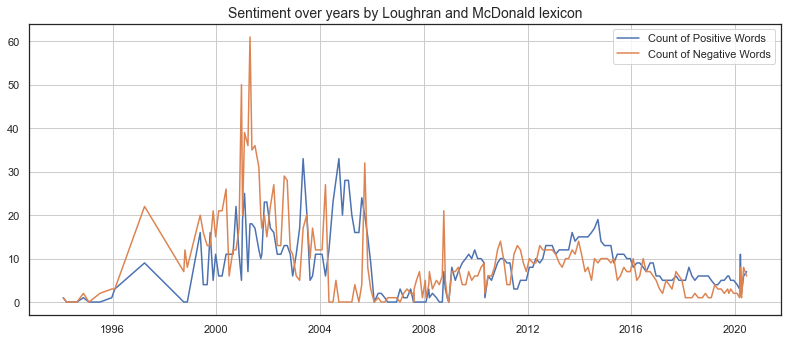

In [ ]:
fig, ax = plt.subplots(figsize=(12,5))

ax.plot(stmt_df[['n_pos_words', 'n_neg_words']]) 
plt.title('Sentiment over years by Loughran and McDonald lexicon', fontsize=14)
plt.legend(['Count of Positive Words', 'Count of Negative Words'])
ax.grid(True)

plt.show()

In [ ]:
DotCom = np.logical_and(stmt_df.index > '2000-03', stmt_df.index < '2002-10') #Dot-com bubble
OhEight = np.logical_and(stmt_df.index > '2007-04', stmt_df.index < '2009-03') #Financial crisis of 2007–2008
EuroDebt = np.logical_and(stmt_df.index > '2010-09', stmt_df.index < '2012-09') #European debt crisis
Asian = np.logical_and(stmt_df.index > '2015-01', stmt_df.index < '2016-06') #2015–16 Chinese stock market turbulence
Corona = np.logical_and(stmt_df.index > '2020-03', stmt_df.index < '2020-12') #Coronavirus
Recessions = np.logical_or.reduce((DotCom, OhEight, EuroDebt, Asian, Corona))

Greenspan = np.logical_and(stmt_df.index > '1987-08-11', stmt_df.index < '2006-01-31')
Bernanke = np.logical_and(stmt_df.index > '2006-02-01', stmt_df.index < '2014-01-31')
Yellen = np.logical_and(stmt_df.index > '2014-02-03', stmt_df.index < '2018-02-03')
Powell = np.logical_and(stmt_df.index > '2018-02-05', stmt_df.index < '2022-02-05')
chair = np.logical_or.reduce((Greenspan, Yellen))


NameError: name 'recessions' is not defined

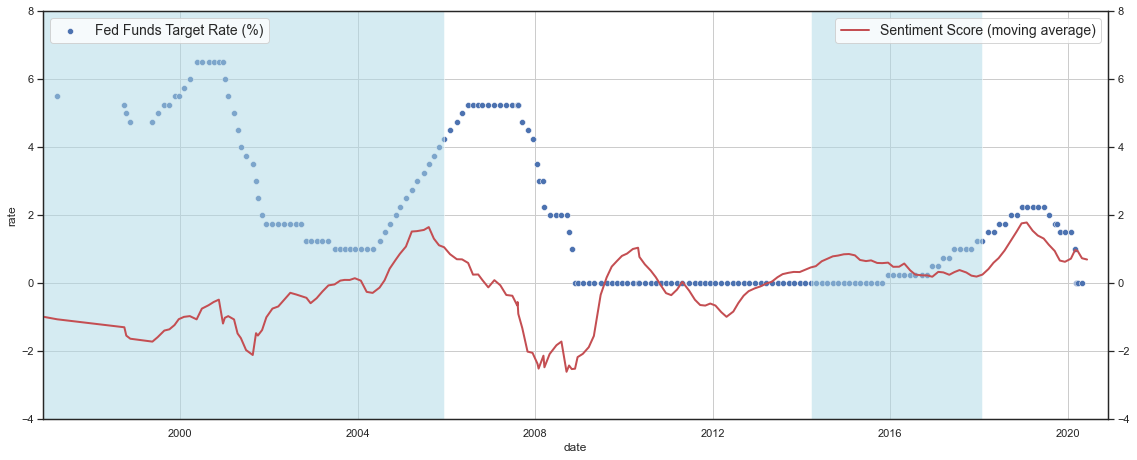

In [ ]:
Window = 8
CompToMA = stmt_df['tone_score'].rolling(Window).mean()

fig, ax = plt.subplots(figsize=(17,7))
sns.scatterplot(x=stmt_df.index.get_level_values(0), y=stmt_df['rate'], ax=ax)
ax2 = ax.twinx() 
ax2.plot(stmt_df.index, CompToMA, c = 'r', linewidth= 2.0)
ax.legend(['Fed Funds Target Rate (%)'], loc=2, fontsize=14)
ax2.legend(['Sentiment Score (moving average)'], loc=1, fontsize=14)
ax.set_xlim('1996-12', '2020-12')
ax.set_ylim(-4, 8)
ax2.set_ylim(-4, 8)
ax.grid(True)

import matplotlib.transforms as mtransforms
trans = mtransforms.blended_transform_factory(ax.transData, ax.transAxes)
theta = 0.9
ax.fill_between(stmt_df.index, 0, 10, where = chair, facecolor='lightblue', alpha=0.5, transform=trans)
ax.fill_between(stmt_df.index, 0, 10, where = recessions, facecolor='grey', alpha=0.5, transform=trans)

props = dict(boxstyle='round', facecolor='skyblue', alpha=0.2)
ax.text(0.15, -0.1, "Alan Greenspan", transform=ax.transAxes, fontsize=14, verticalalignment='top', bbox=props)
ax.text(0.50, -0.1, "Ben Bernanke", transform=ax.transAxes, fontsize=14, verticalalignment='top', bbox=props)
ax.text(0.75, -0.1, "Janet Yellen", transform=ax.transAxes, fontsize=14, verticalalignment='top', bbox=props)
ax.text(0.90, -0.1, "Jerome Powell", transform=ax.transAxes, fontsize=14, verticalalignment='top', bbox=props)

props = dict(boxstyle='round', facecolor='white', alpha=0.5)
ax.text(0.14, 0.85, "Dot-com bubble", transform=ax.transAxes, fontsize=14, verticalalignment='top', bbox=props)
ax.text(0.43, 0.85, "Financial crisis", transform=ax.transAxes, fontsize=14, verticalalignment='top', bbox=props)
ax.text(0.57, 0.85, "European debt \n crisis", transform=ax.transAxes, fontsize=14, verticalalignment='top', bbox=props)
ax.text(0.75, 0.85, "China stock \n turbulence", transform=ax.transAxes, fontsize=14, verticalalignment='top', bbox=props)
ax.text(0.95, 0.85, "Covid-19", transform=ax.transAxes, fontsize=14, verticalalignment='top', bbox=props)


arrow_style = dict(facecolor='black', shrink=0.05)
ax.annotate('QE1', xy=('2008-11-25', 0), xytext=('2008-11-25', -3.5), size=16, ha='center', arrowprops=arrow_style)
ax.annotate('QE2', xy=('2010-11-03', 0), xytext=('2010-11-03', -3.5), size=16, ha='center', arrowprops=arrow_style)
ax.annotate('QE3', xy=('2012-09-13', 0), xytext=('2012-09-13', -3.5), size=16, ha='center', arrowprops=arrow_style)
ax.annotate('Tapering', xy=('2013-12-18', 0), xytext=('2013-12-18', -3.5), size=16, ha='center', arrowprops=arrow_style)

plt.title('Net Sentiment with Fed Rates, Resession and Chairpersons', fontsize=16)
plt.show()

## **Process economic indices data**
The details can be found on `2_FOMC_Analysis_Preprocess_NonText.ipynb` and `4_FOMC_Analysis_EDA_NonText.ipynb`

## **Taylor Rule**
As a part of feature engineering, calculate taylor rules and see whether the first derivatives and difference from FED rate could be used. FED has released how policymakers use economic indices data, so try to calculate them from raw data. <BR />
https://www.federalreserve.gov/monetarypolicy/policy-rules-and-how-policymakers-use-them.htm

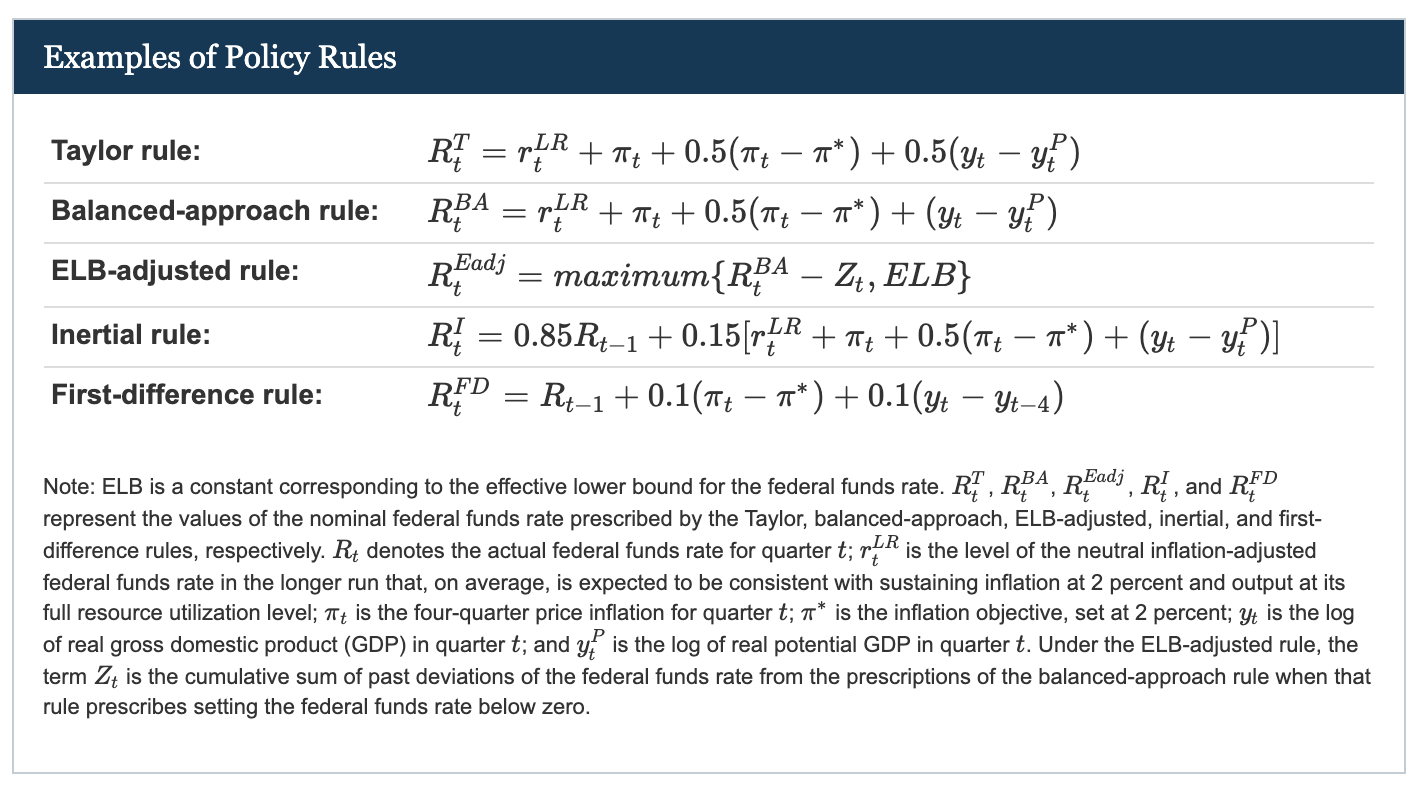

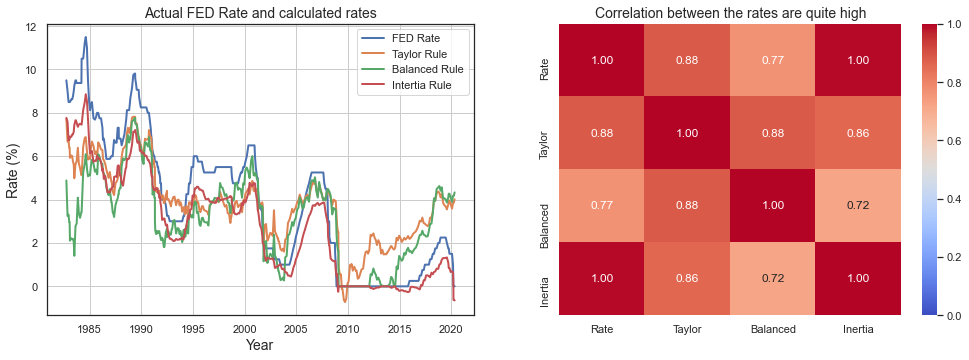

In [ ]:
taylor=meta_df[['Rate', 'Taylor', 'Balanced', 'Inertia']]
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 5))
sns.lineplot(data=taylor, dashes=False, lw=2, ax=ax1)
ax1.grid(True)
ax1.set_title('Actual FED Rate and calculated rates', fontsize=14)
ax1.set_xlabel('Year', fontsize=14)
ax1.set_ylabel('Rate (%)', fontsize=14)
ax1.legend(['FED Rate', 'Taylor Rule', 'Balanced Rule', 'Intertia Rule'])
sns.heatmap(taylor.astype(float).corr(), cmap="coolwarm", annot=True, fmt=".2f", vmin=0, vmax=1, ax=ax2)
ax2.set_title('Correlation between the rates are quite high', fontsize=14)
plt.show()

## **Select features from meta data**
Create moving average over different period, check correlation with Rate Decision (Raise/Hold/Lower) and select which features would be used as inputs for training. Also, impute the missing values.

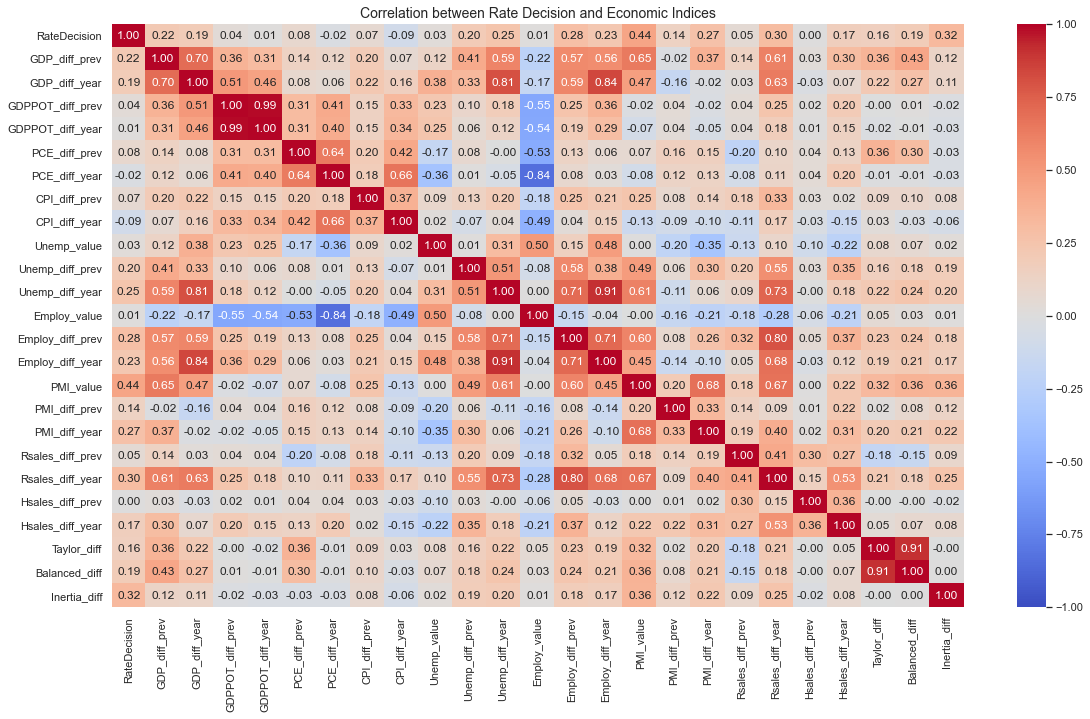

In [ ]:
corr_columns = ['RateDecision', 'GDP_diff_prev', 'GDP_diff_year', 'GDPPOT_diff_prev', 'GDPPOT_diff_year',
                'PCE_diff_prev', 'PCE_diff_year', 'CPI_diff_prev', 'CPI_diff_year', 
                'Unemp_value', 'Unemp_diff_prev', 'Unemp_diff_year',
                'Employ_value', 'Employ_diff_prev', 'Employ_diff_year',
                'PMI_value', 'PMI_diff_prev', 'PMI_diff_year', 
                'Rsales_diff_prev', 'Rsales_diff_year', 'Hsales_diff_prev', 'Hsales_diff_year',
                'Taylor_diff', 'Balanced_diff', 'Inertia_diff']

fig, ax = plt.subplots(1, 1, figsize=(17, 10))

sns.heatmap(meta_df[corr_columns].astype(float).corr(), cmap="coolwarm", annot=True, fmt=".2f", vmin=-1, vmax=1, ax=ax)
ax.set_title("Correlation between Rate Decision and Economic Indices", fontsize=14)
plt.show()

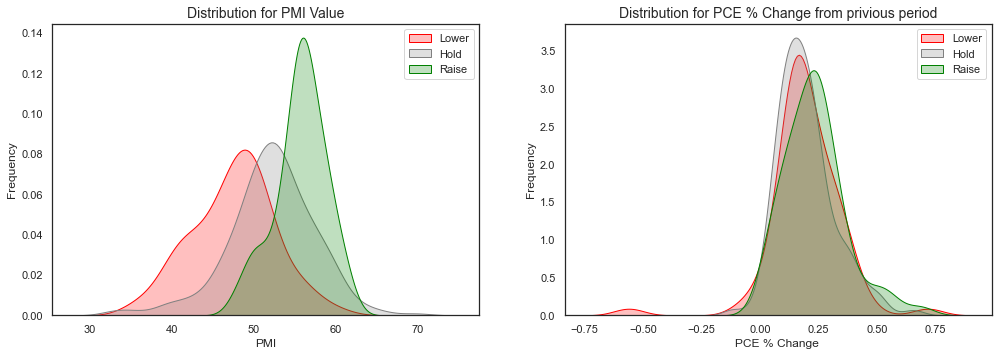

In [ ]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 5))
sns.kdeplot(meta_df['PMI_value'][(meta_df["RateDecision"] == -1) & (meta_df['PMI_value'].notnull())], ax=ax1, color="Red", shade=True)
sns.kdeplot(meta_df['PMI_value'][(meta_df["RateDecision"] == 0) & (meta_df['PMI_value'].notnull())], ax=ax1, color="Gray", shade=True)
sns.kdeplot(meta_df['PMI_value'][(meta_df["RateDecision"] == 1) & (meta_df['PMI_value'].notnull())], ax=ax1, color="Green", shade=True)
ax1.set_xlabel('PMI')
ax1.set_ylabel("Frequency")
ax1.set_title("Distribution for PMI Value", fontsize=14)
ax1.legend(["Lower", "Hold", "Raise"])
sns.kdeplot(meta_df['PCE_diff_prev'][(meta_df["RateDecision"] == -1) & (meta_df['PCE_diff_prev'].notnull())], ax=ax2, color="Red", shade=True)
sns.kdeplot(meta_df['PCE_diff_prev'][(meta_df["RateDecision"] == 0) & (meta_df['PCE_diff_prev'].notnull())], ax=ax2, color="Gray", shade=True)
sns.kdeplot(meta_df['PCE_diff_prev'][(meta_df["RateDecision"] == 1) & (meta_df['PCE_diff_prev'].notnull())], ax=ax2, color="Green", shade=True)
ax2.set_xlabel('PCE % Change ')
ax2.set_ylabel("Frequency")
ax2.set_title("Distribution for PCE % Change from privious period", fontsize=14)
ax2.legend(["Lower", "Hold", "Raise"])
plt.show()


## **Process text data**
The details can be found in `3_FOMC_Analysis_Preprocess_Text.ipynb`

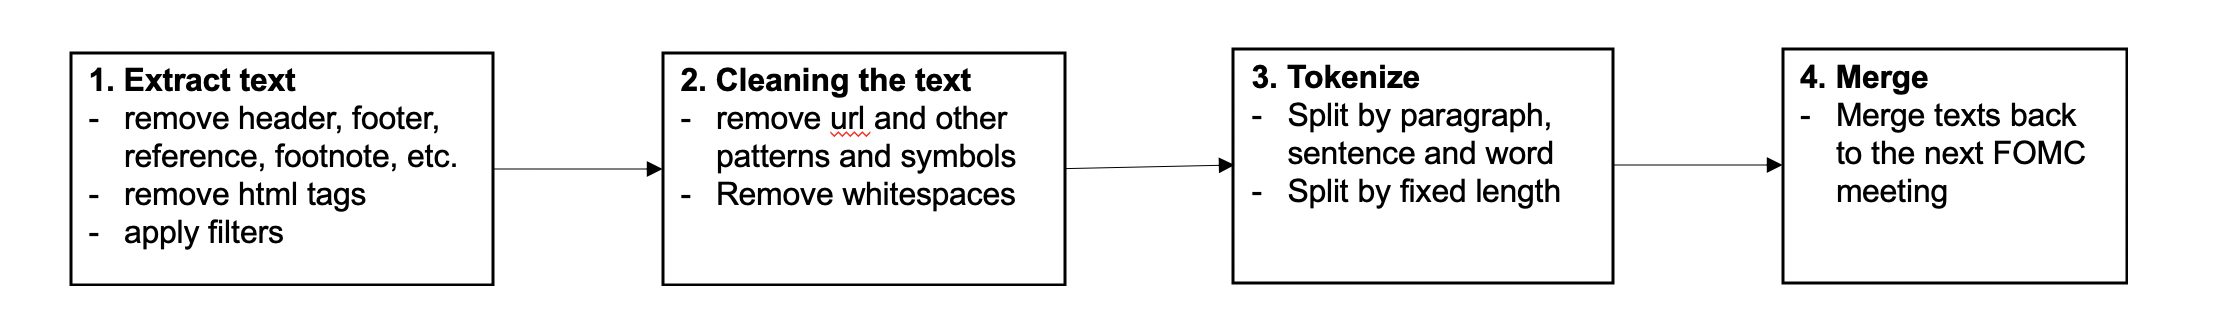

In [ ]:
file = open("../data/train_data/train_df.pickle", "rb")
train_df = pickle.load(file)
file.close()

In [ ]:
file = open("../data/FOMC/statement.pickle", "rb")
statement_df = pickle.load(file)
file.close()
print(statement_df.iloc[-2]['contents'].replace("\n[SECTION]\n", ""))

The Federal Reserve, the central bank of the United States, provides the nation with a safe, flexible, and stable monetary and financial system.

Federal Open Market Committee

Monetary Policy Principles and Practice

Policy Implementation

Reports

Review of Monetary Policy Strategy, Tools, and Communications

Institution Supervision

Reports

Reporting Forms

Supervision & Regulation Letters

Banking Applications & Legal Developments

Regulatory Resources

Banking & Data Structure

Regulations & Statutes

Payment Policies

Reserve Bank Payment Services & Data

Financial Market Utilities & Infrastructures

Research, Committees, and Forums

Working Papers and Notes

Models and Tools

Bank Assets and Liabilities

Bank Structure Data

Business Finance

Dealer Financing Terms

Exchange Rates and International Data

Financial Accounts

Household Finance

Industrial Activity

Interest Rates

Micro Data Reference Manual (MDRM)

Money Stock and Reserve Balances

Other

Regulations

Supervisio

In [ ]:
print(stmt_df.loc['2020-04-29']['text'])

The coronavirus outbreak is causing tremendous human and economic hardship across the United States and around the world. The virus and the measures taken to protect public health are inducing sharp declines in economic activity and a surge in job losses. Weaker demand and significantly lower oil prices are holding down consumer price inflation. The disruptions to economic activity here and abroad have significantly affected financial conditions and have impaired the flow of credit to U.S. households and businesses. The ongoing public health crisis will weigh heavily on economic activity, employment, and inflation in the near term, and poses considerable risks to the economic outlook over the medium term. In light of these developments, the Committee decided to maintain the target range for the federal funds rate at 0 to 1/4 percent. The Committee expects to maintain this target range until it is confident that the economy has weathered recent events and is on track to achieve its maxi

In [ ]:
print(stmt_df.loc['2020-04-29']['tokenized'])

['the', 'coronavirus', 'outbreak', 'cause', 'tremendous', 'human', 'economic', 'hardship', 'across', 'unite', 'state', 'around', 'world', 'the', 'virus', 'measure', 'take', 'protect', 'public', 'health', 'induce', 'sharp', 'decline', 'economic', 'activity', 'surge', 'job', 'loss', 'weaker', 'demand', 'significantly', 'lower', 'oil', 'price', 'hold', 'consumer', 'price', 'inflation', 'the', 'disruption', 'economic', 'activity', 'abroad', 'significantly', 'affect', 'financial', 'condition', 'impair', 'flow', 'credit', 'household', 'business', 'the', 'ongoing', 'public', 'health', 'crisis', 'weigh', 'heavily', 'economic', 'activity', 'employment', 'inflation', 'near', 'term', 'pose', 'considerable', 'risk', 'economic', 'outlook', 'medium', 'term', 'in', 'light', 'development', 'committee', 'decide', 'maintain', 'target', 'range', 'federal', 'fund', 'rate', 'percent', 'the', 'committee', 'expect', 'maintain', 'target', 'range', 'confident', 'economy', 'weather', 'recent', 'event', 'track',

In [ ]:
print(stmt_df.loc['2020-04-29']['token_ids'])

[17, 1280, 1281, 1072, 1310, 1311, 37, 1236, 1312, 198, 199, 158, 1313, 17, 1314, 83, 26, 1315, 1286, 1287, 481, 1080, 117, 37, 88, 1316, 320, 713, 938, 161, 322, 206, 633, 147, 394, 425, 147, 98, 17, 761, 37, 88, 510, 322, 1119, 202, 47, 1317, 1288, 345, 418, 417, 17, 253, 1286, 1287, 924, 518, 1318, 37, 88, 540, 98, 308, 309, 408, 517, 163, 37, 307, 1092, 309, 51, 159, 260, 9, 10, 386, 268, 989, 6, 118, 24, 119, 17, 9, 19, 386, 268, 989, 1206, 166, 1173, 140, 538, 1285, 680, 413, 540, 147, 370, 369, 17, 9, 276, 436, 1214, 621, 312, 37, 307, 286, 312, 79, 1286, 1287, 401, 204, 260, 691, 98, 14, 698, 966, 821, 743, 475, 166, 51, 1135, 348, 894, 218, 114, 31, 32, 33, 9, 366, 188, 19, 37, 47, 1067, 413, 540, 773, 358, 119, 98, 773, 50, 1166, 26, 351, 1009, 989, 312, 286, 83, 252, 8, 47, 631, 98, 14, 98, 128, 662, 202, 1204, 260, 552, 475, 1288, 345, 418, 417, 6, 15, 276, 447, 860, 547, 867, 869, 1017, 547, 889, 258, 475, 363, 8, 293, 100, 101, 136, 1294, 32, 33, 828, 202, 47, 51, 734, 7,

## Build and Train Models
Take textual inputs and meta inputs to predict three classes: Raise, Hold or Lower

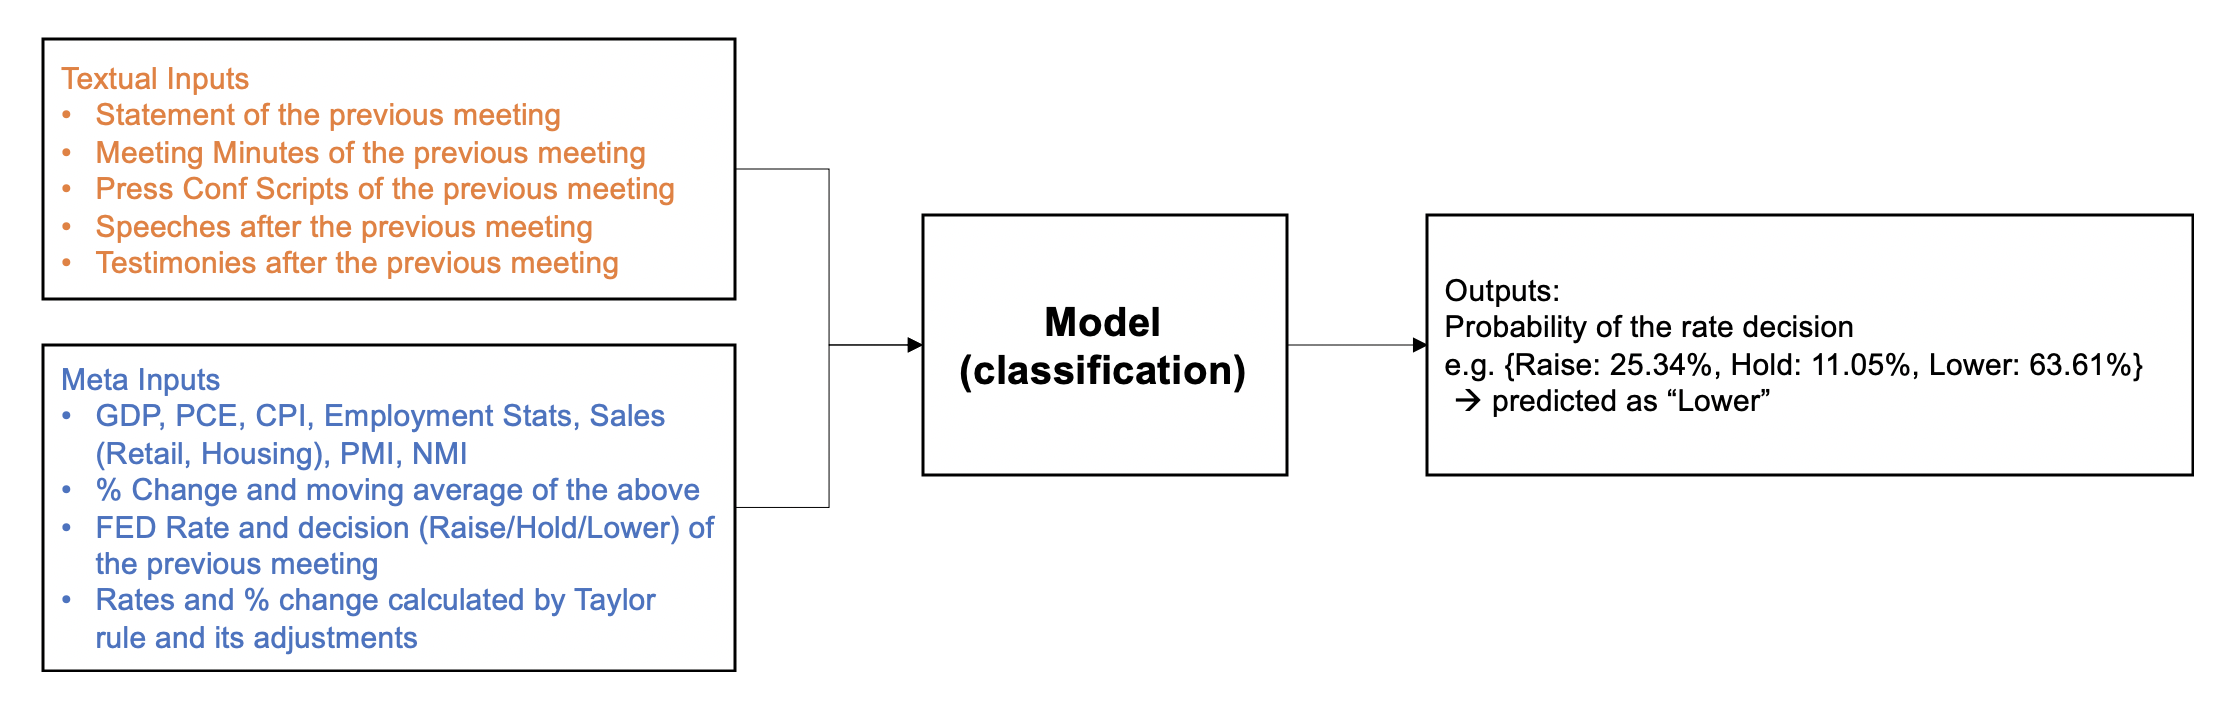


The models are the same as Financial News / Tweets sentiment analysis but include meta inputs and concatinate them.

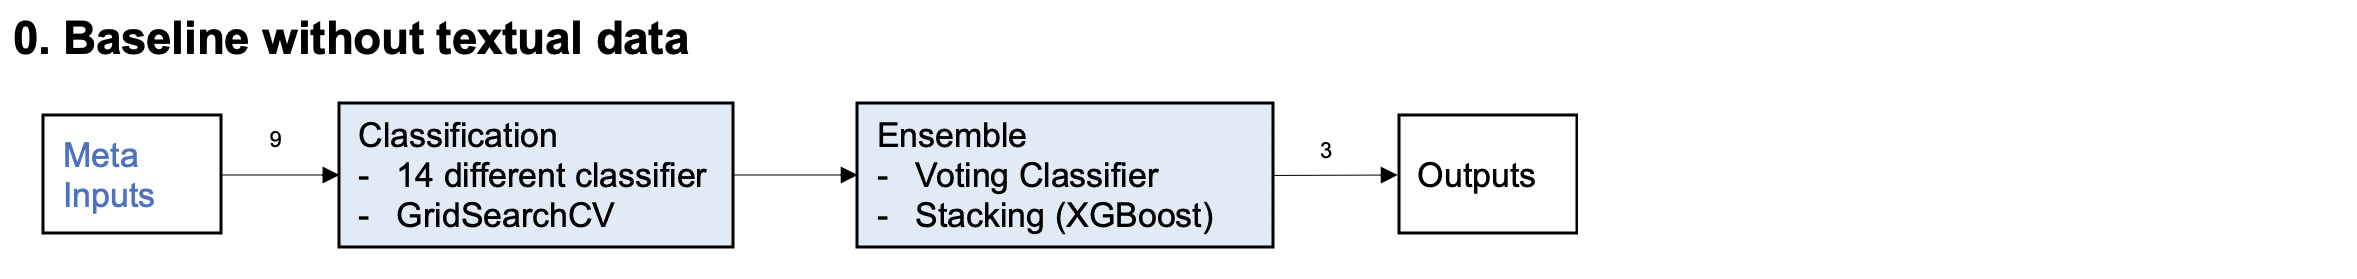

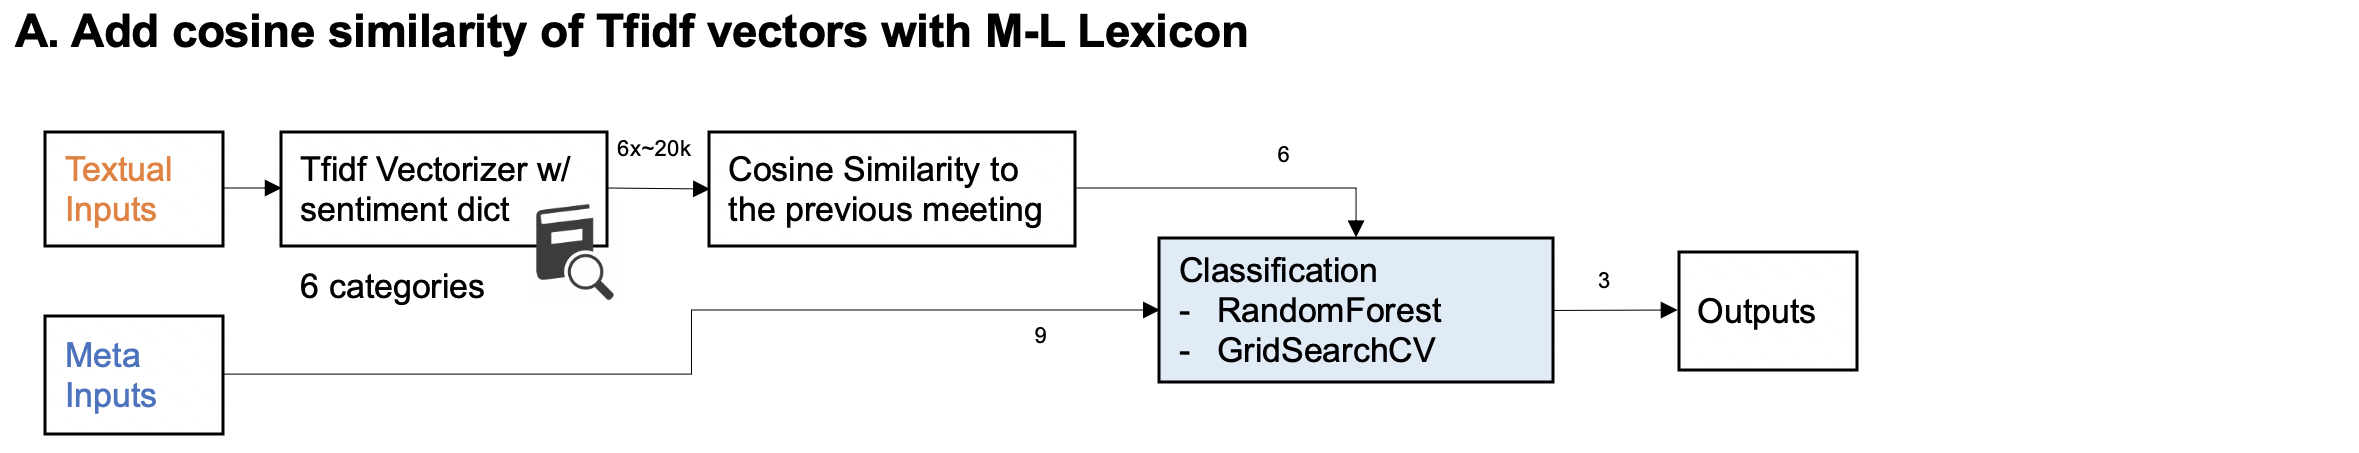

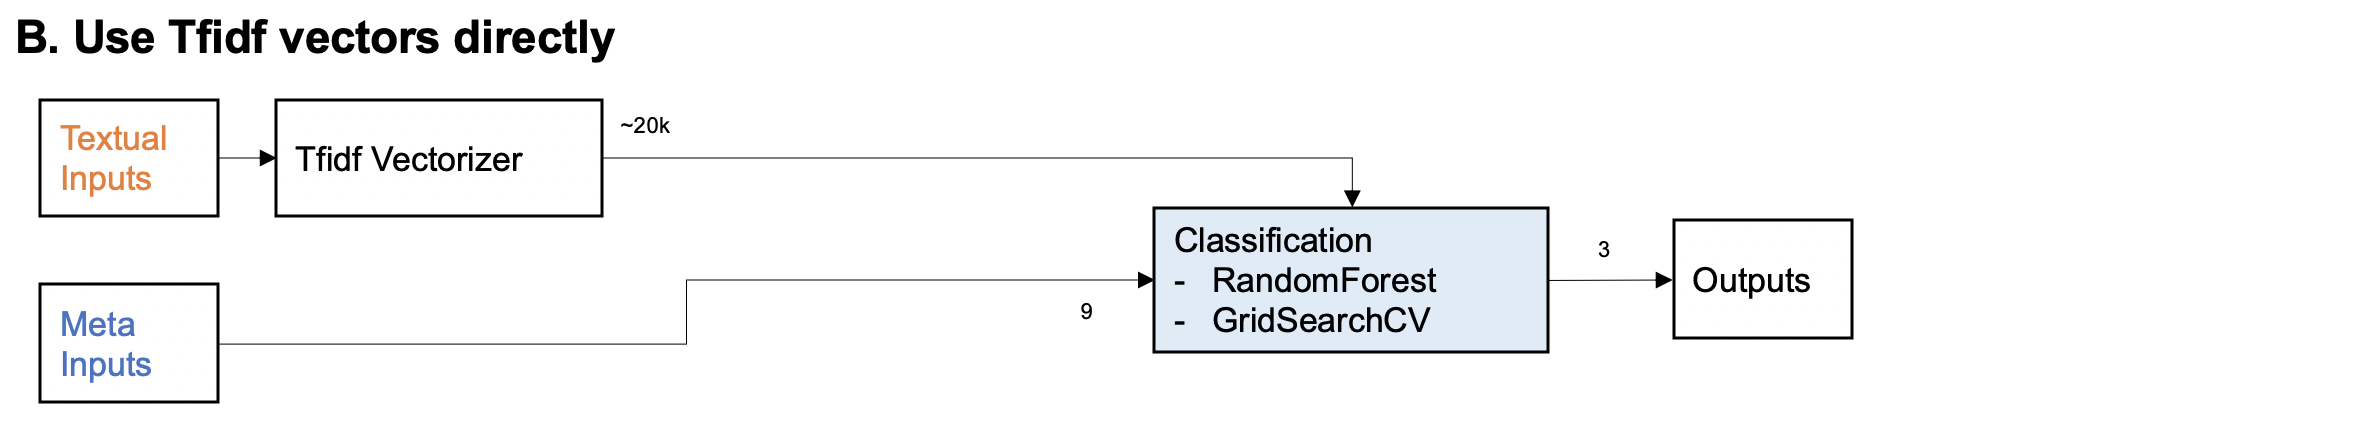

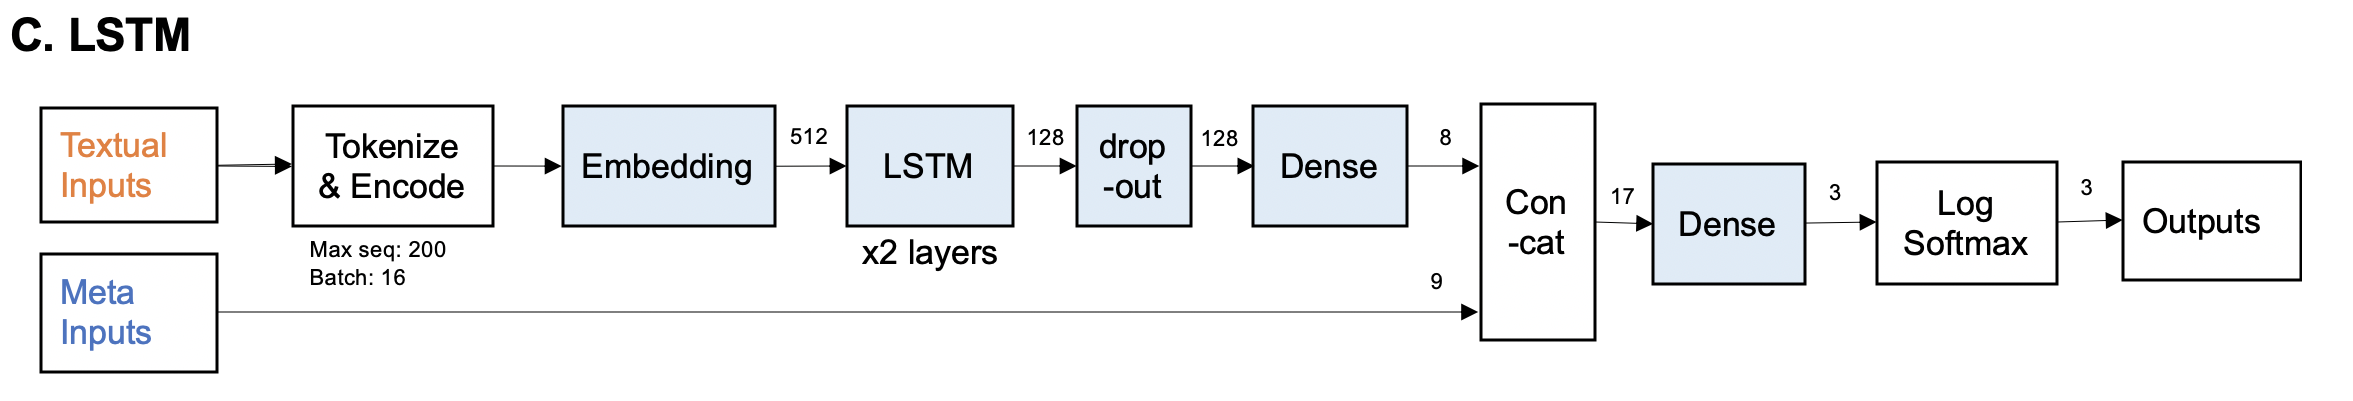

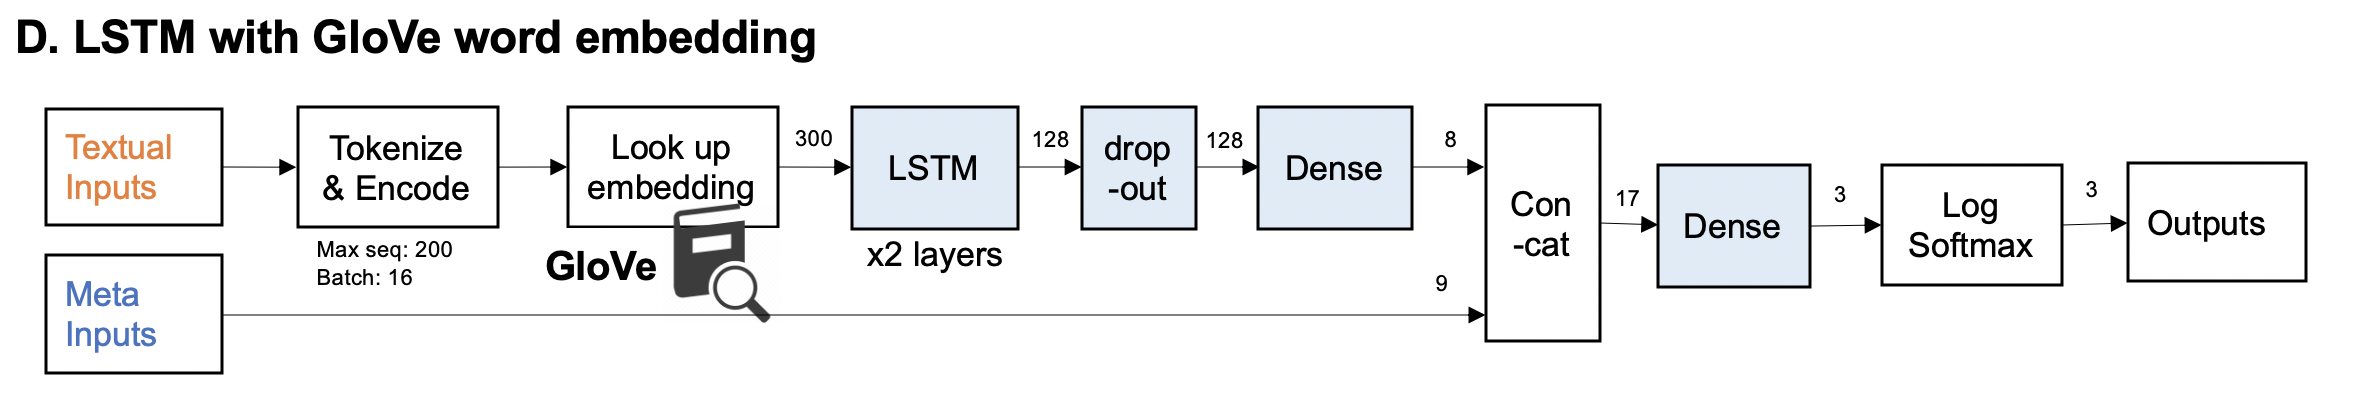

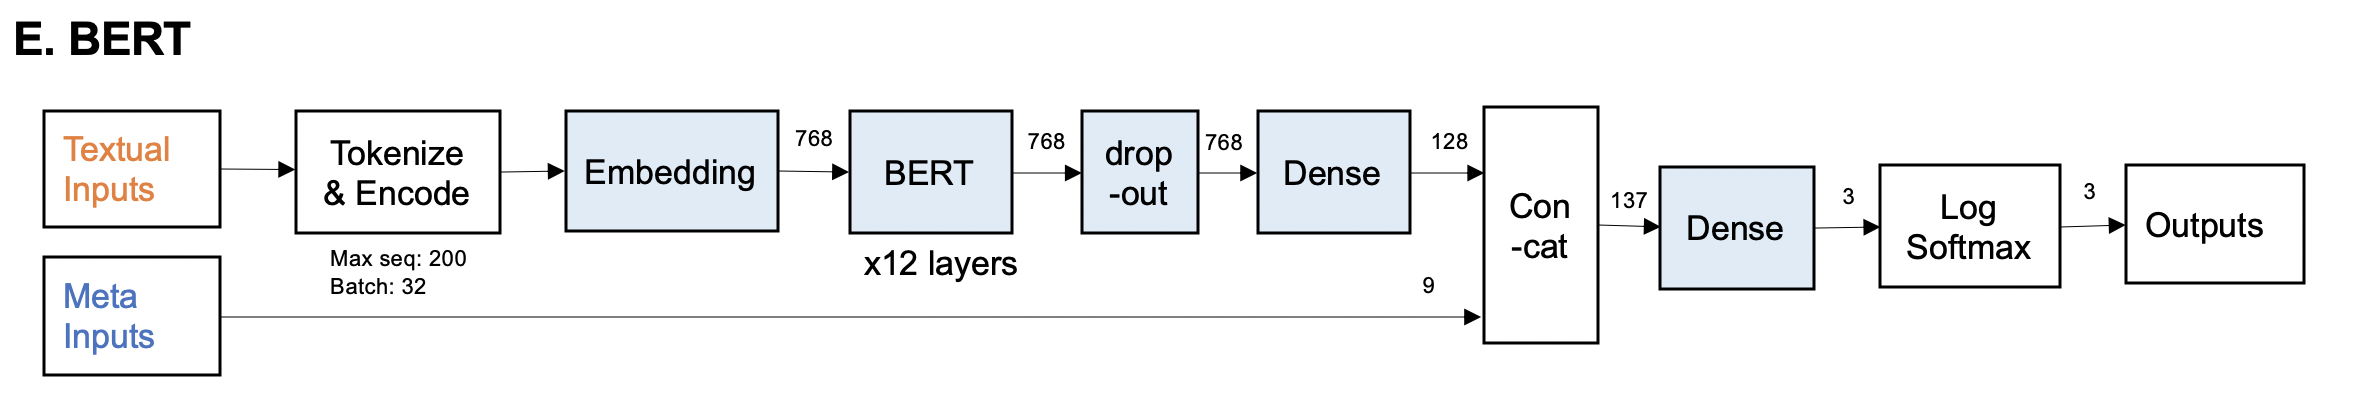

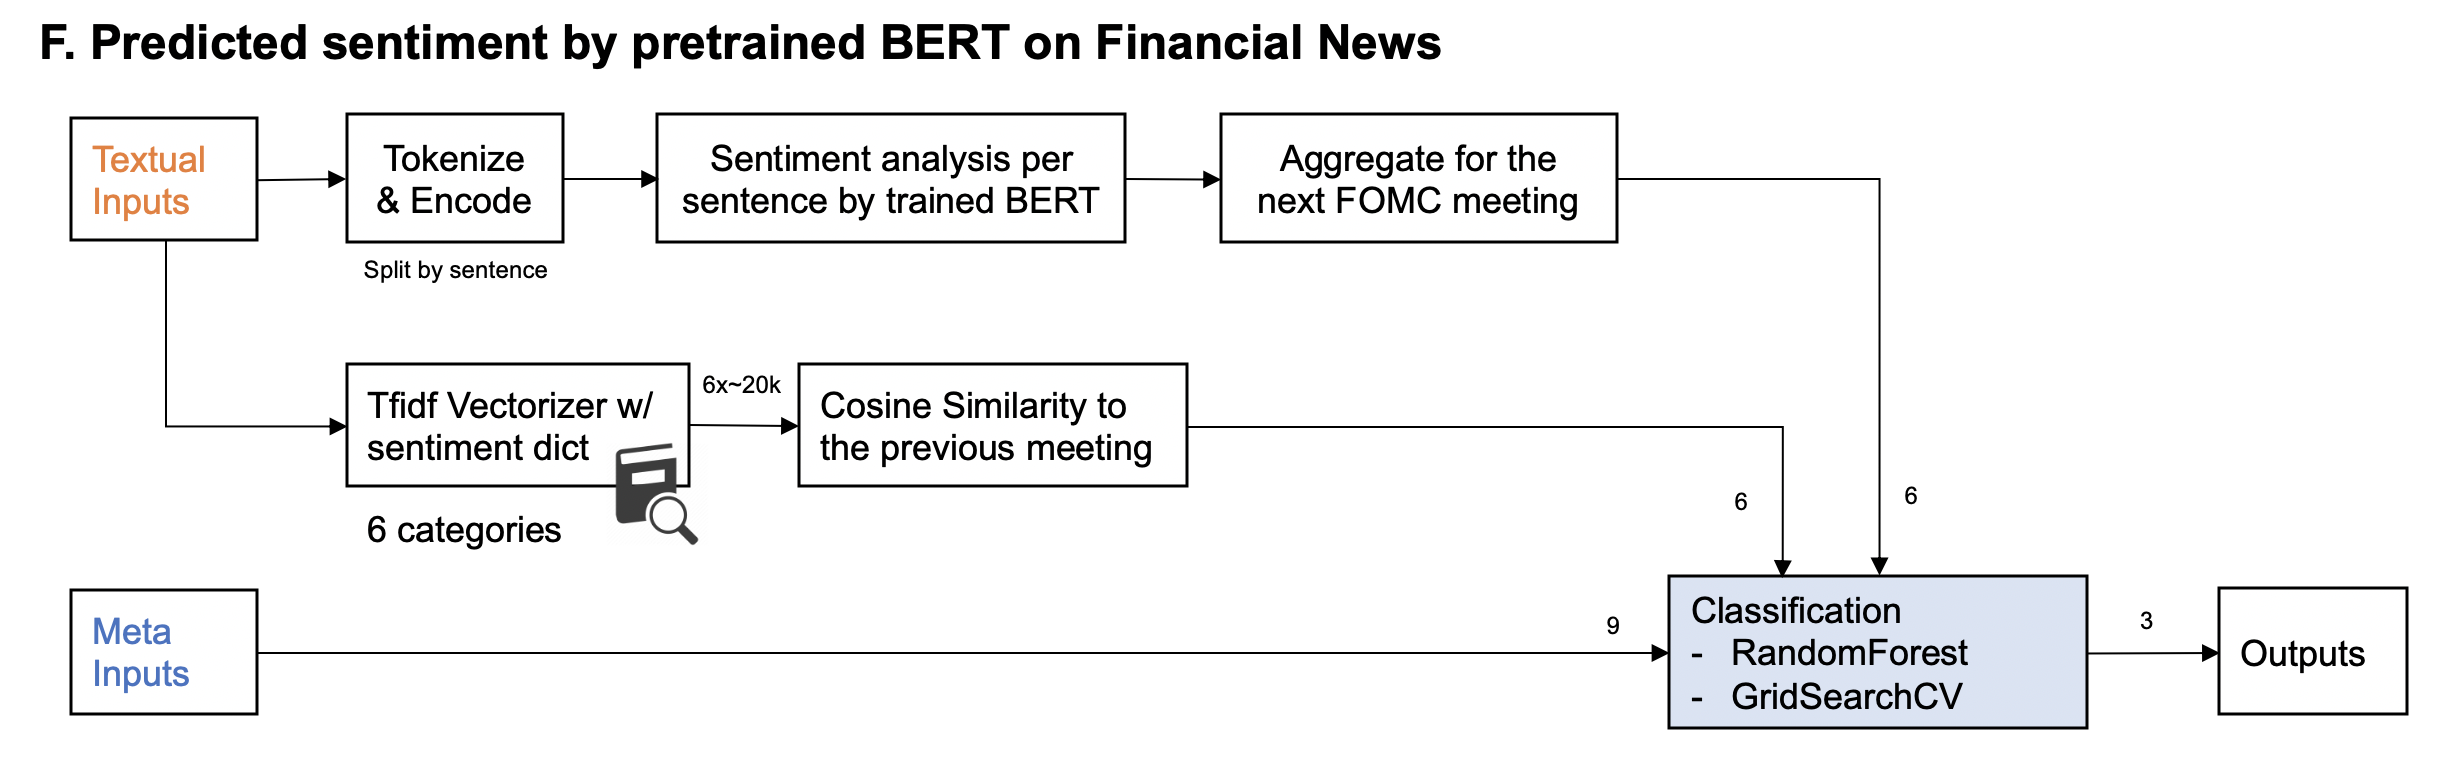

## Final Result

Due to the nature of long text per data and very small data set availability, the result was different from financial news and tweets analysis.
Simple lexicon approach with cosine similarity works well and better than more complex models as complex ones could not learn enough with limited data.
Finally, use of the trained BERT model to extract sentence-wise sentiment as inputs to the classification task outperformed the lexicon approach, which shows the sentiment analysis by BERT model could provide some meaningful insight to predict the FOMC decision.

As a future work, there're two main areas to improve:
1. Tackle the lack of enough training data - The models have clearly overfitted to train samples and failed to generalize well, espicially boosting algorithms are prone to overfitting. Hyperparameter tuning and imputation was considered there. In addition, configuraing the model and splitting data to augument the training data by synthetic approach could potentially benefitial. 
2. Improve input text quality - The input texts contain a lot of irrelevant paragraphs, which have nothing to to with FED target rate decision. For example, there are information about regulations, organisation structure and infrastructures. Filtering out less relevant inputs will improve the accuracy of the model prediction as well as training efficiency.

In [ ]:
final_result_dict = {
    'model': ["Baseline"]*2 + ["A: Cosine Similarity"]*2 + ["B: Tfidf"]*2 + ["C: LSTM"]*2 + ["D: LSTM + GloVe"]*2 + ["E: BERT"]*2 + ["F: Prediction by BERT"]*2,
    'metrics': ["Accuracy", "F1 Score"]*7,
    'score': [0.63, 0.50] + [0.78, 0.67] + [0.67, 0.33] + [0.54, 0.24] + [0.63, 0.41] + [0.59, 0.25] + [0.82, 0.73]
}
final_result = pd.DataFrame(final_result_dict)

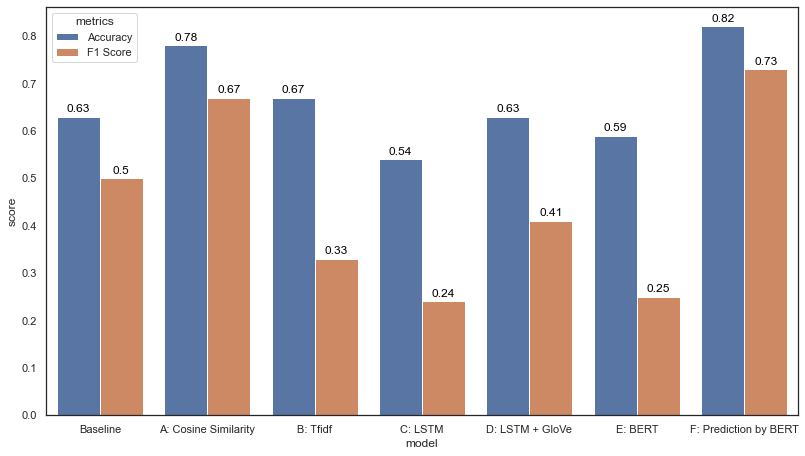

In [ ]:
plt.figure(figsize=(12, 7))
g = sns.barplot(x='model', y='score', hue='metrics', data=final_result)
for index, row in final_result.loc[final_result['metrics']=='Accuracy'].iterrows():
    g.text(index/2-0.2, row.score+0.01, row.score, color='black', ha="center")
for index, row in final_result.loc[final_result['metrics']=='F1 Score'].iterrows():
    g.text(index/2-0.3, row.score+0.01, row.score, color='black', ha="center")
plt.show()
